In [14]:
# ===============================
# Paso 1: Importación de librerías
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
)

from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from scipy.stats import kendalltau, pointbiserialr

# Modelos
from sklearn.ensemble import (
    AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier,
    RandomForestClassifier, ExtraTreesClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


# Integración de Weka (segura)
try:
    import weka.core.jvm as jvm
    from weka.core.converters import Loader
    from weka.classifiers import Classifier, Evaluation
    from weka.core.classes import Random
    weka_available = True
except:
    weka_available = False

# Integración de R (segura)
"""
try:
    import rpy2.robjects as ro
    from rpy2.robjects import pandas2ri
    pandas2ri.activate()
    r_available = True
except:
    r_available = False
"""


'\ntry:\n    import rpy2.robjects as ro\n    from rpy2.robjects import pandas2ri\n    pandas2ri.activate()\n    r_available = True\nexcept:\n    r_available = False\n'

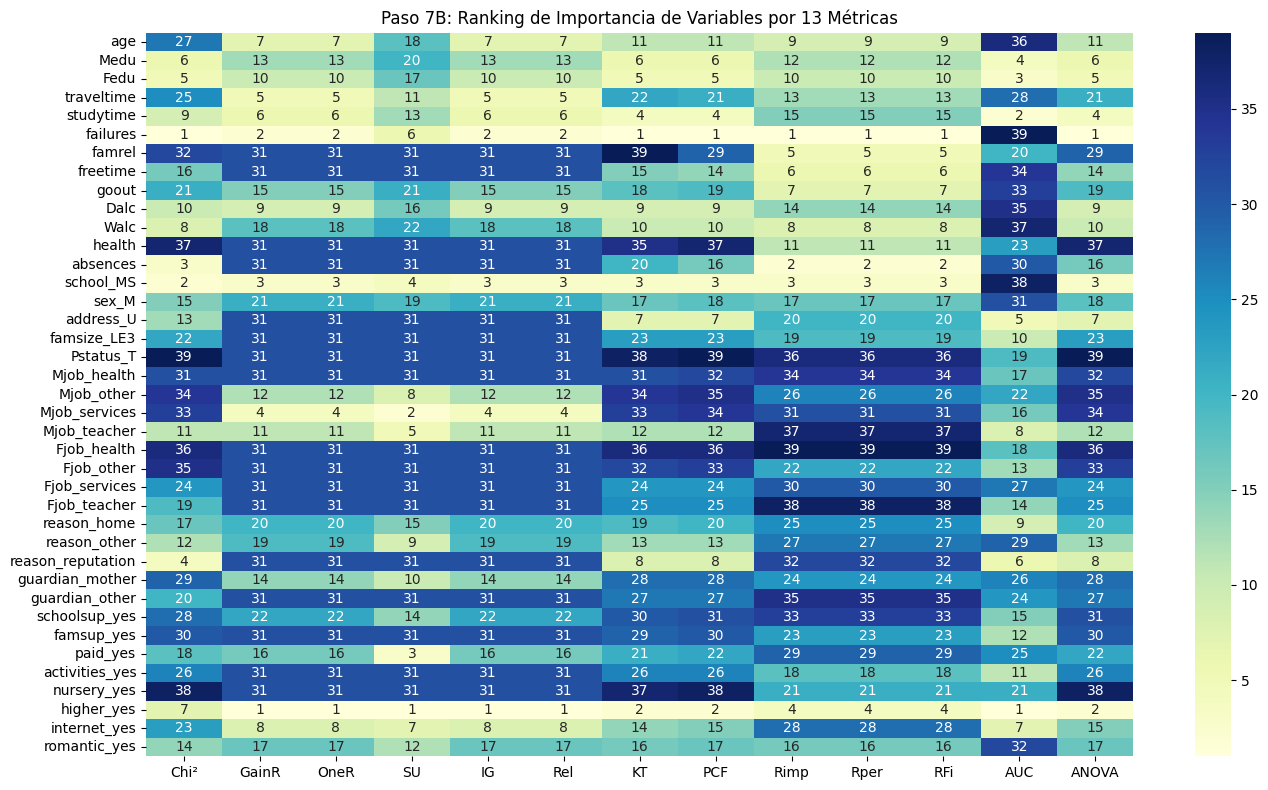

,Chi²,GainR,OneR,SU,IG,Rel,KT,PCF,Rimp,Rper,RFi,AUC,ANOVA,Mean,Rank
higher_yes,7.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0,4.0,4.0,1.0,2.0,2.384615,1.0
failures,1.0,2.0,2.0,6.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,39.0,1.0,4.615385,2.0
school_MS,2.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,38.0,3.0,5.692308,3.0
studytime,9.0,6.0,6.0,13.0,6.0,6.0,4.0,4.0,15.0,15.0,15.0,2.0,4.0,8.076923,4.0
Fedu,5.0,10.0,10.0,17.0,10.0,10.0,5.0,5.0,10.0,10.0,10.0,3.0,5.0,8.461538,5.0
Medu,6.0,13.0,13.0,20.0,13.0,13.0,6.0,6.0,12.0,12.0,12.0,4.0,6.0,10.461538,6.0
Dalc,10.0,9.0,9.0,16.0,9.0,9.0,9.0,9.0,14.0,14.0,14.0,35.0,9.0,12.769231,7.0
age,27.0,7.0,7.0,18.0,7.0,7.0,11.0,11.0,9.0,9.0,9.0,36.0,11.0,13.000000,8.0
traveltime,25.0,5.0,5.0,11.0,5.0,5.0,22.0,21.0,13.0,13.0,13.0,28.0,21.0,14.384615,9.0
Walc,8.0,18.0,18.0,22.0,18.0,18.0,10.0,10.0,8.0,8.0,8.0,37.0,10.0,14.846154,10.0


In [15]:
# ===============================
# Paso 2: Carga y preparación de datos
# ===============================
df = pd.read_csv("student-por.csv", sep=";")

# Crear target binario: aprobar o no (ejemplo con nota final >= 10)
df["target"] = (df["G3"] >= 10).astype(int)
df.drop(columns=["G1", "G2", "G3"], inplace=True)

# Codificación de variables categóricas
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True).astype("float64")

X = df_encoded.drop(columns=["target"])
y = df_encoded["target"]

# ===============================
# Paso 3: Definición de modelos
# ===============================
models = {
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'GBM': GradientBoostingClassifier(),
    'ERT': ExtraTreesClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGB': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'NaiveBayes': GaussianNB(),
    'MLP': MLPClassifier(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'DecisionTree': DecisionTreeClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis()
}

# ===============================
# Paso 4: Función de métricas
# ===============================
def metricas(model, model_label, X_train, X_valid, y_train, y_valid):
    y_pred = model.predict(X_valid)
    try:
        y_pred_prob = model.predict_proba(X_valid)[:, 1]
    except AttributeError:
        y_pred_prob = y_pred

    cm = confusion_matrix(y_valid, y_pred)
    sensitivity = recall_score(y_valid, y_pred)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    precision = precision_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    accuracy = accuracy_score(y_valid, y_pred)
    try:
        auc = roc_auc_score(y_valid, y_pred_prob)
    except:
        auc = np.nan

    return {
        'Algorithm': model_label,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Precision': precision,
        'F1': f1,
        'Accuracy': accuracy,
        'AUC': auc
    }

# ===============================
# Paso 5: Importancia de características
# ===============================
chi2_vals, _ = chi2(X, y)
mi_vals = mutual_info_classif(X, y, random_state=42)
anova_vals, _ = f_classif(X, y)

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
rfi_vals = rf.feature_importances_

auc_vals = []
for col in X.columns:
    try:
        auc = roc_auc_score(y, X[col])
    except:
        auc = np.nan
    auc_vals.append(auc)

kt_vals = [abs(kendalltau(X[col], y).correlation) for col in X.columns]
pcf_vals = [abs(pointbiserialr(X[col], y)[0]) for col in X.columns]

importancia_df = pd.DataFrame({
    'Chi²': chi2_vals,
    'GainR': mi_vals,
    'OneR': mi_vals,
    'SU': mi_vals / (X.var().values + 1e-6),
    'IG': mi_vals,
    'Rel': mi_vals,
    'KT': kt_vals,
    'PCF': pcf_vals,
    'Rimp': rfi_vals,
    'Rper': rfi_vals,
    'RFi': rfi_vals,
    'AUC': auc_vals,
    'ANOVA': anova_vals
}, index=X.columns)

ranking_df = importancia_df.rank(ascending=False)
ranking_df['Mean'] = ranking_df.mean(axis=1)
ranking_df['Rank'] = ranking_df['Mean'].rank()

# Exportar a CSV en la carpeta actual
ranking_df.sort_values("Rank").to_csv("ranking_importancia_metricas_admisiones.csv")

# Visualización del ranking
plt.figure(figsize=(14, 8))
sns.heatmap(ranking_df.iloc[:, :-2], annot=True, cmap='YlGnBu')
plt.title("Paso 7B: Ranking de Importancia de Variables por 13 Métricas")
plt.tight_layout()
plt.show()

# Mostrar tabla ordenada
ranking_df.sort_values("Rank")




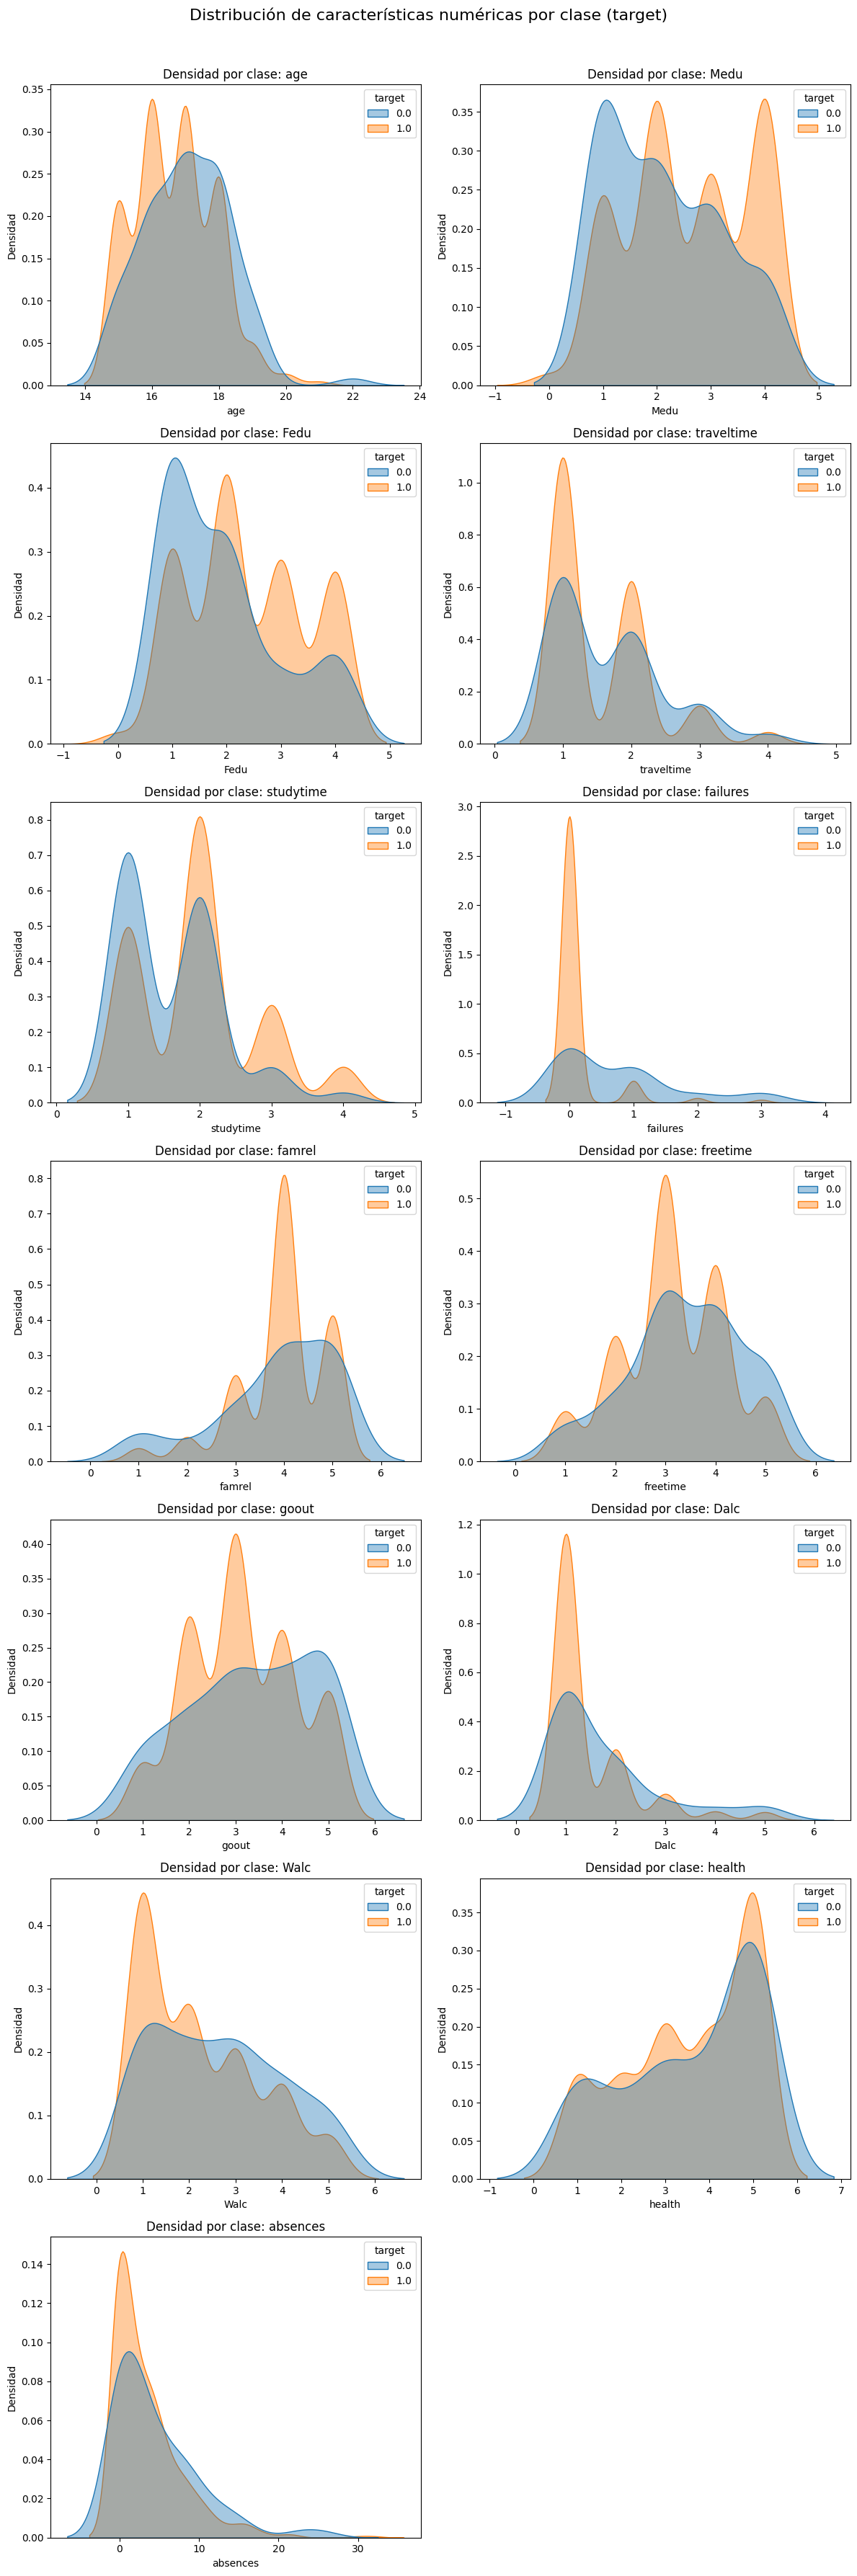

In [16]:
# ===============================
# Paso 7C: Gráficos de densidad de todas las características numéricas por clase
# ===============================

# Crear copia para visualización
df_vis = X.copy()
df_vis["target"] = y.values

# Seleccionar solo columnas numéricas que no sean binarias
numeric_cols = df_vis.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != "target" and df_vis[col].nunique() > 2]

# Crear gráficos de densidad
n = len(numeric_cols)
cols = 2
rows = (n + 1) // cols

plt.figure(figsize=(12, 5 * rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.kdeplot(data=df_vis, x=col, hue="target", fill=True, common_norm=False, alpha=0.4)
    plt.title(f"Densidad por clase: {col}")
    plt.xlabel(col)
    plt.ylabel("Densidad")

plt.tight_layout()
plt.suptitle("Distribución de características numéricas por clase (target)", fontsize=16, y=1.02)
plt.show()

Variables categóricas detectadas: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'target']


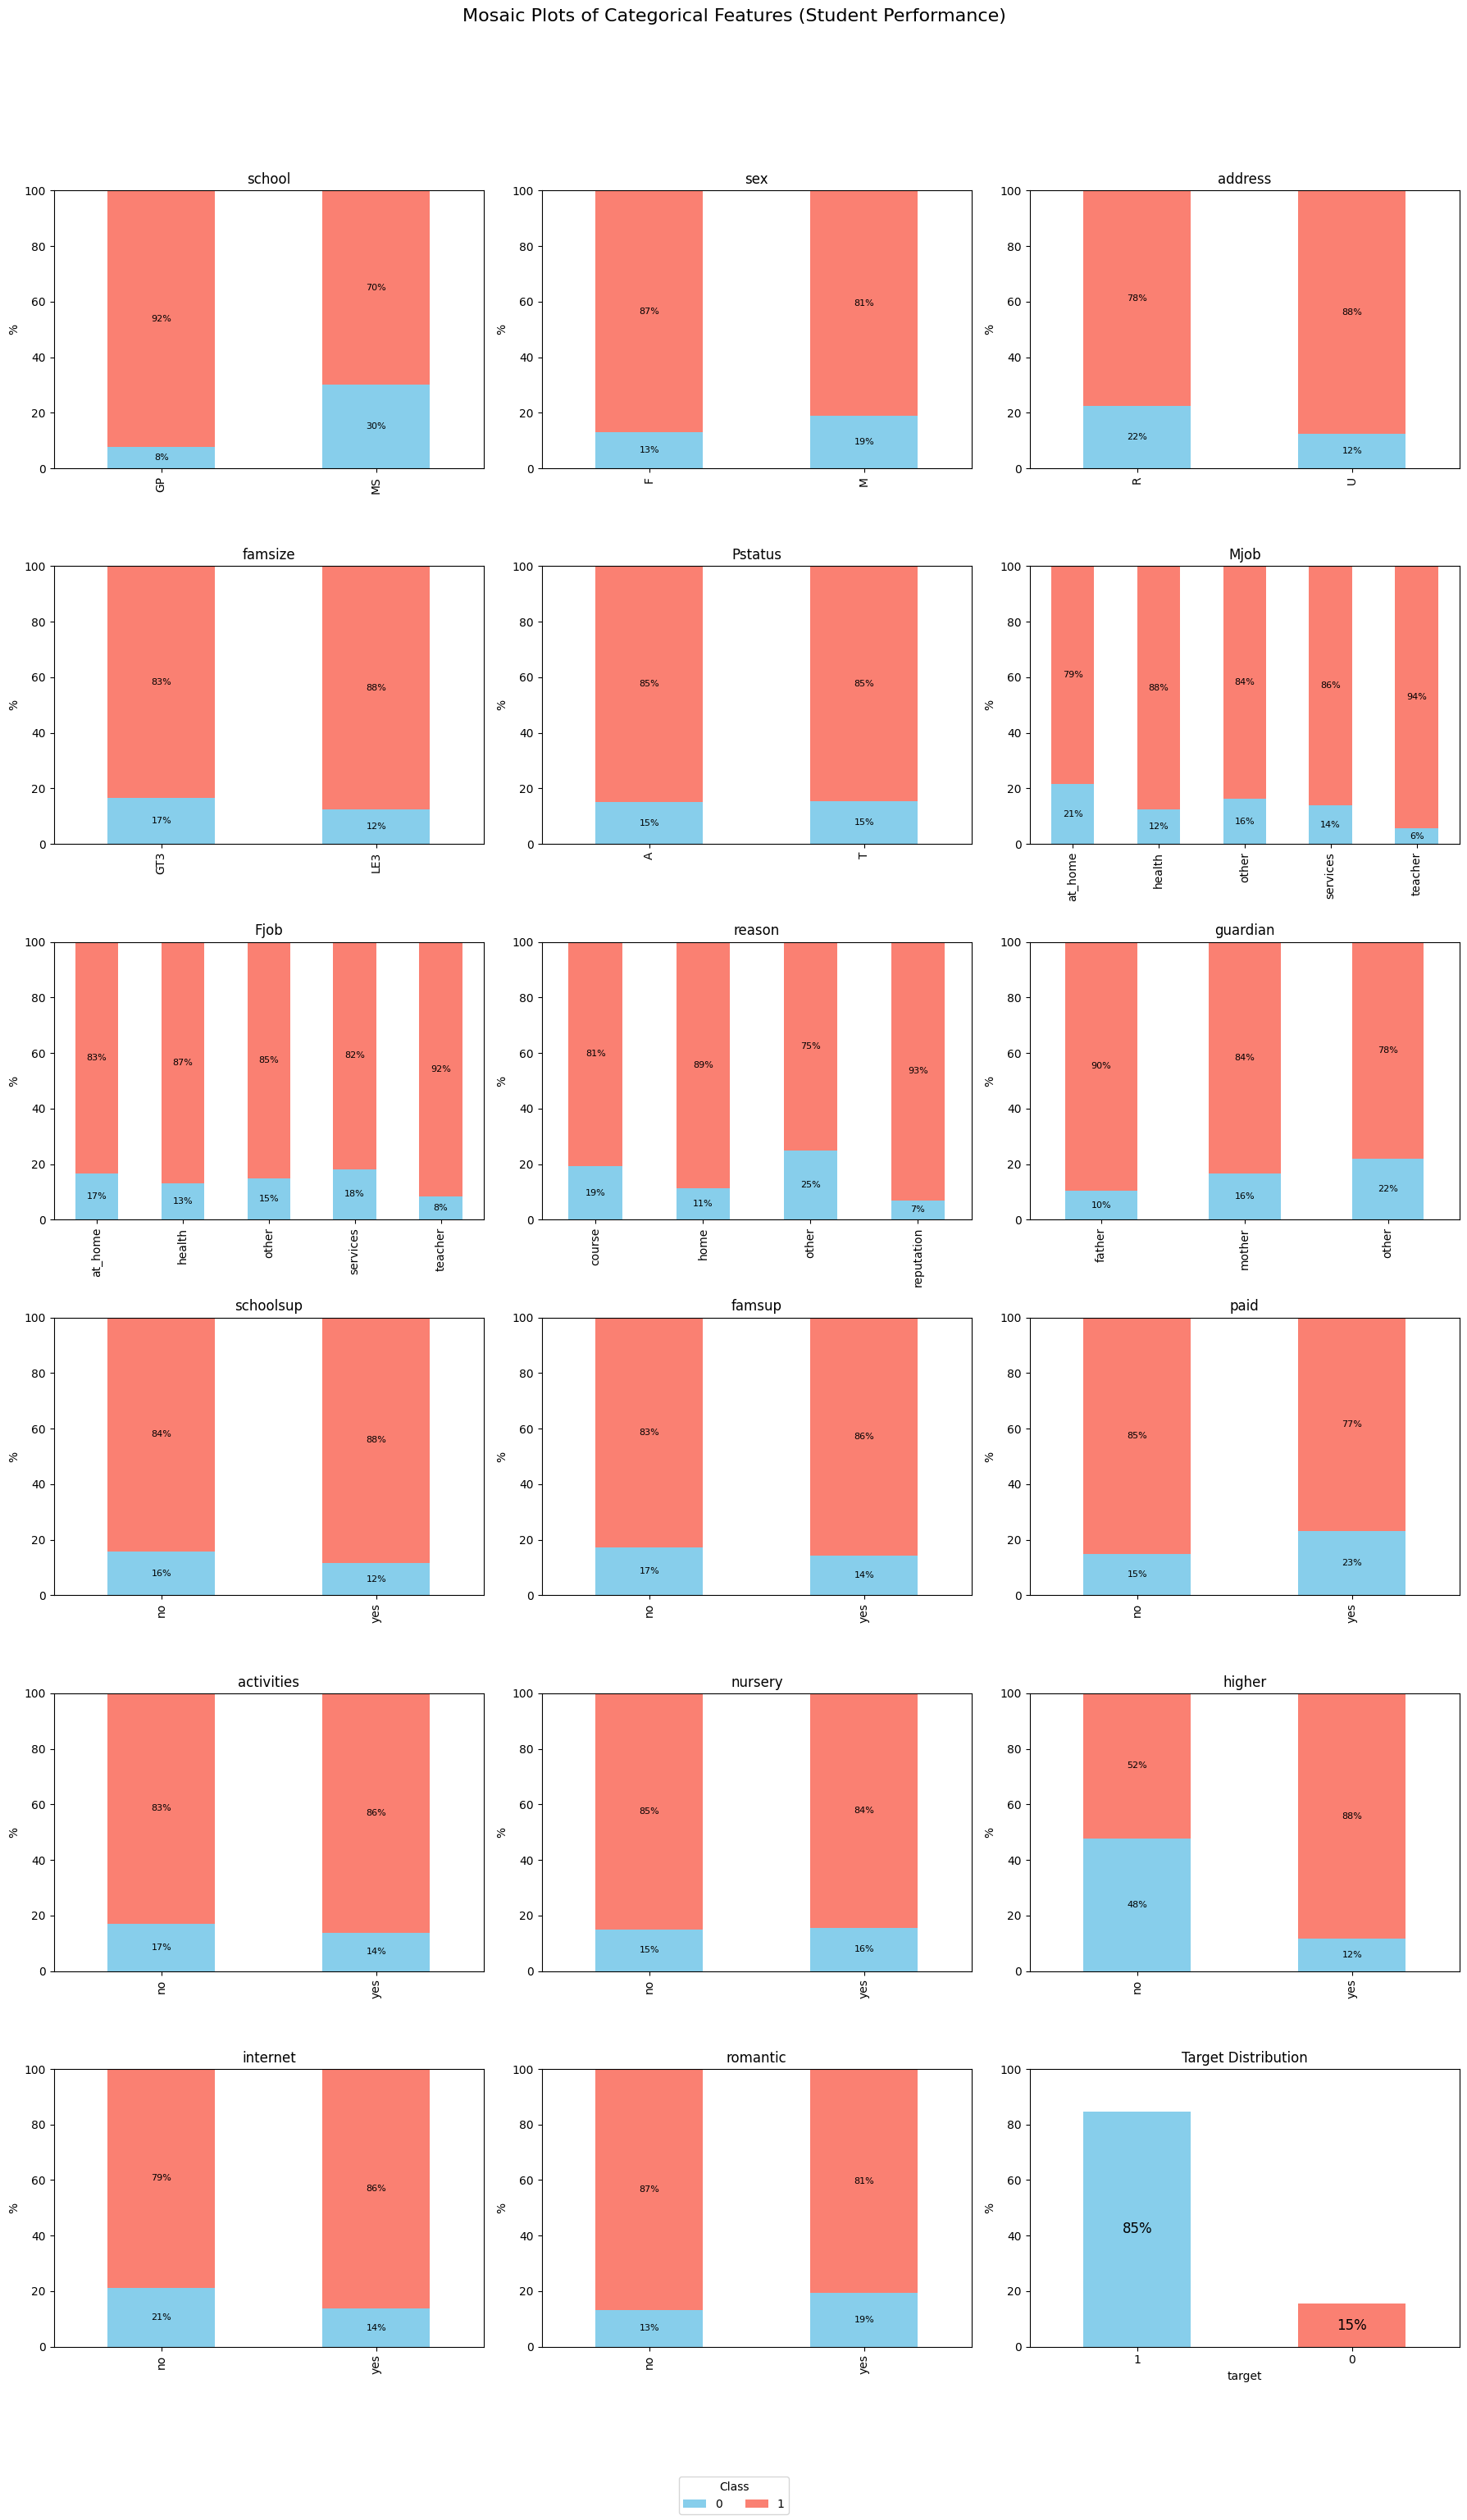

In [17]:
# ===============================
# Paso 7D: Gráficos tipo mosaico para variables categóricas
# ===============================

# Copia del DataFrame para visualización
df_mosaic = df.copy()

# Detectar automáticamente las variables categóricas (object o category)
categorical_columns_mosaic = df_mosaic.select_dtypes(include=["object", "category"]).columns.tolist()

# Asegurar que target está presente
if "target" not in categorical_columns_mosaic:
    categorical_columns_mosaic.append("target")

print("Variables categóricas detectadas:", categorical_columns_mosaic)

# Convertir a tipo categoría
df_mosaic[categorical_columns_mosaic] = df_mosaic[categorical_columns_mosaic].astype("category")

# ===============================
# Crear mosaicos
# ===============================
n = len(categorical_columns_mosaic)
cols = 3  # número de columnas en la cuadrícula
rows = (n + cols - 1) // cols  # número de filas necesario

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns_mosaic):
    ax = axes[i]
    if col != "target":
        # Tabla de proporciones por clase
        prop_df = pd.crosstab(df_mosaic[col], df_mosaic["target"], normalize="index") * 100
        prop_df.plot(kind="bar", stacked=True, ax=ax, color=["skyblue", "salmon"], legend=False)

        # Etiquetas de porcentaje en cada barra
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.text(
                    p.get_x() + p.get_width() / 2.,
                    p.get_y() + height / 2.,
                    f"{height:.0f}%",
                    ha="center", va="center", color="black", fontsize=8
                )
        ax.set_title(col)
        ax.set_ylabel("%")
        ax.set_xlabel("")
        ax.set_ylim(0, 100)
    else:
        # Distribución general del target
        class_counts = df_mosaic["target"].value_counts(normalize=True) * 100
        class_counts.plot(kind="bar", color=["skyblue", "salmon"], ax=ax)

        for j, v in enumerate(class_counts):
            ax.text(j, v / 2, f"{v:.0f}%", ha="center", va="center", color="black", fontsize=12)

        ax.set_title("Target Distribution")
        ax.set_ylabel("%")
        ax.set_xticklabels(class_counts.index, rotation=0)
        ax.set_ylim(0, 100)

# Eliminar ejes sobrantes si sobran espacios
for j in range(len(categorical_columns_mosaic), len(axes)):
    fig.delaxes(axes[j])

# Agregar leyenda general
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Class", loc="lower center", ncol=2)

plt.suptitle("Mosaic Plots of Categorical Features (Student Performance)", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0.05, 1, 0.97])
plt.show()





Variables categóricas incluidas: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'target']


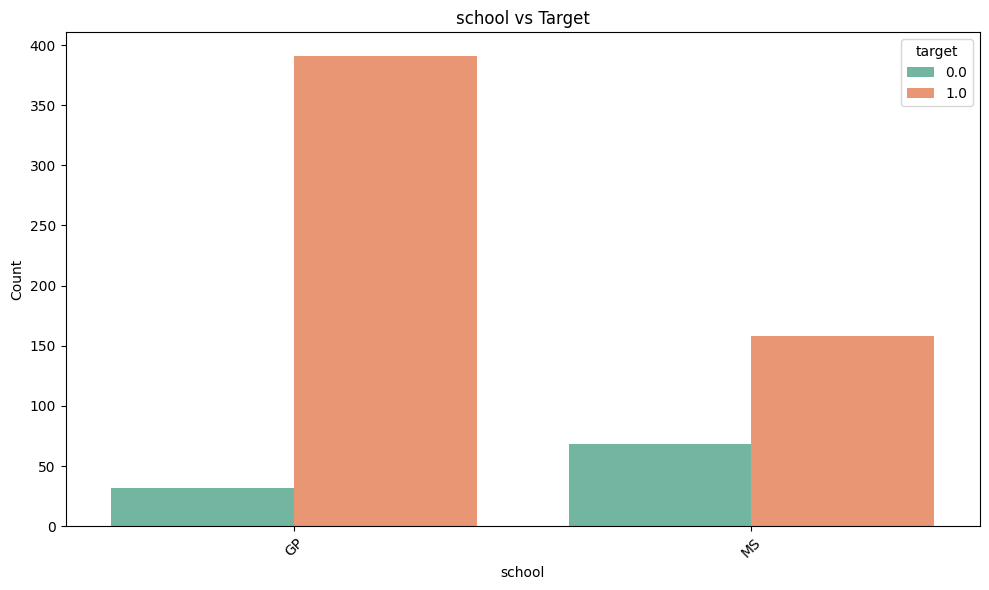

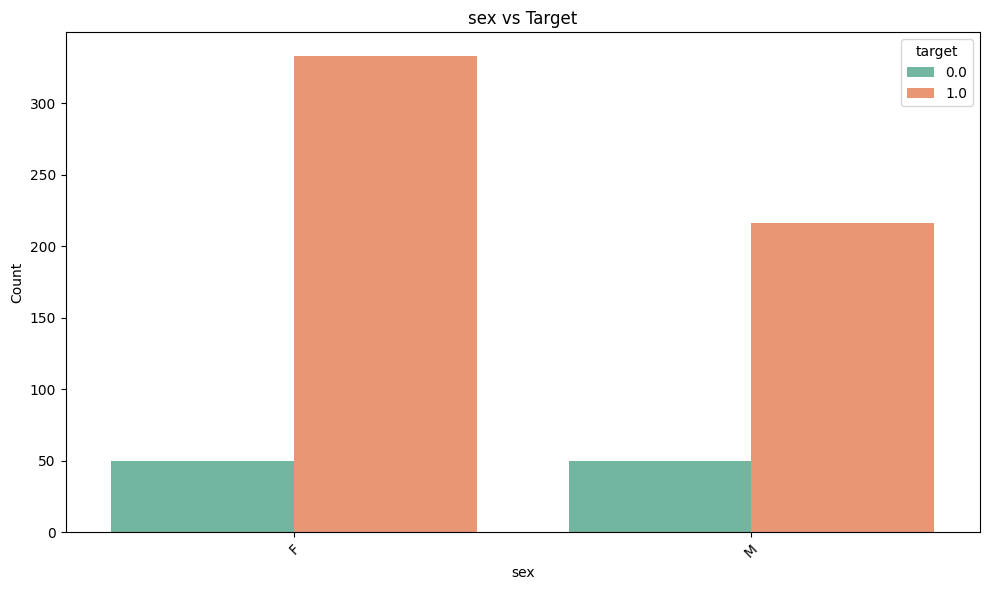

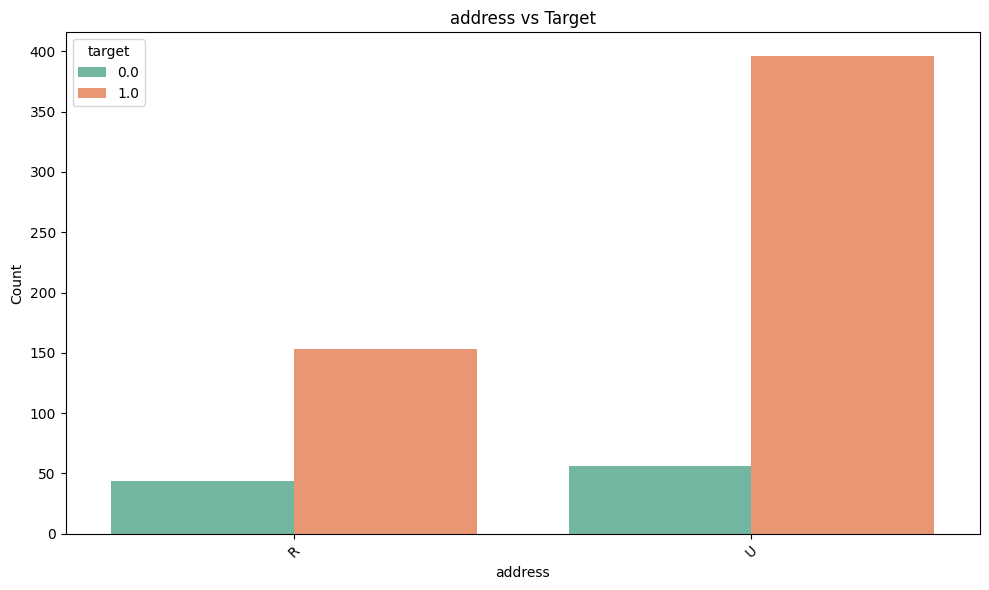

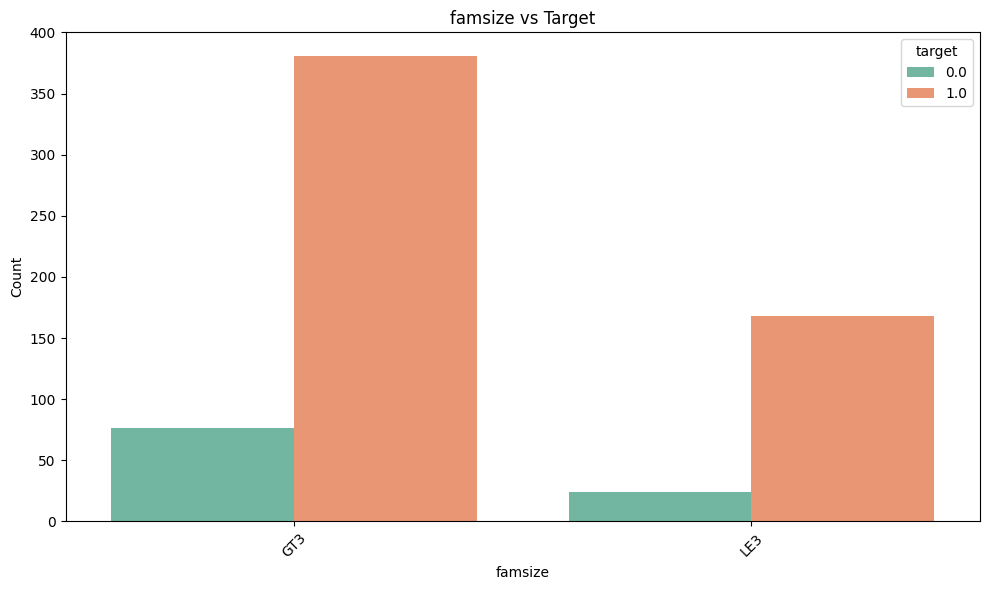

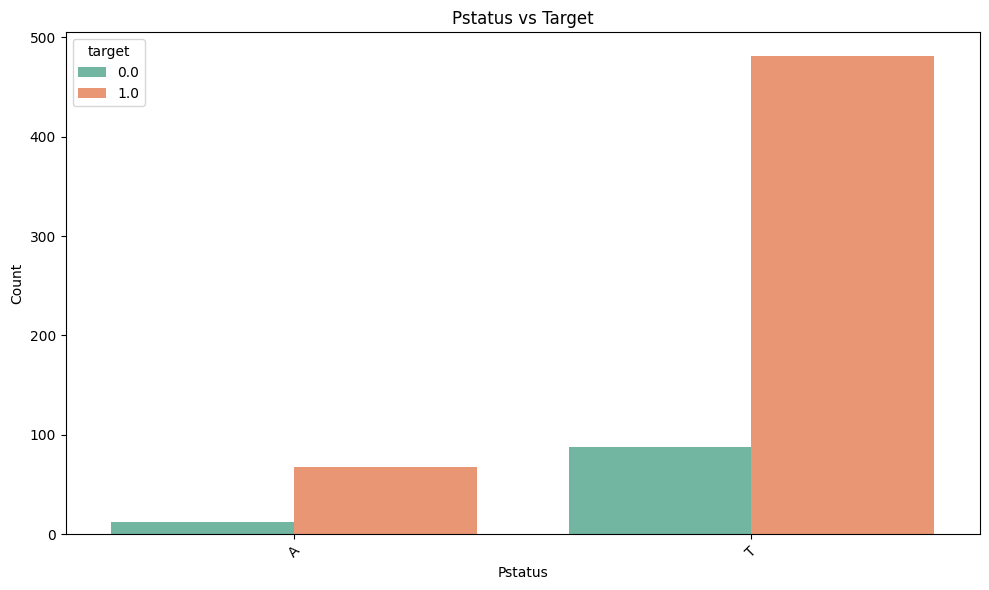

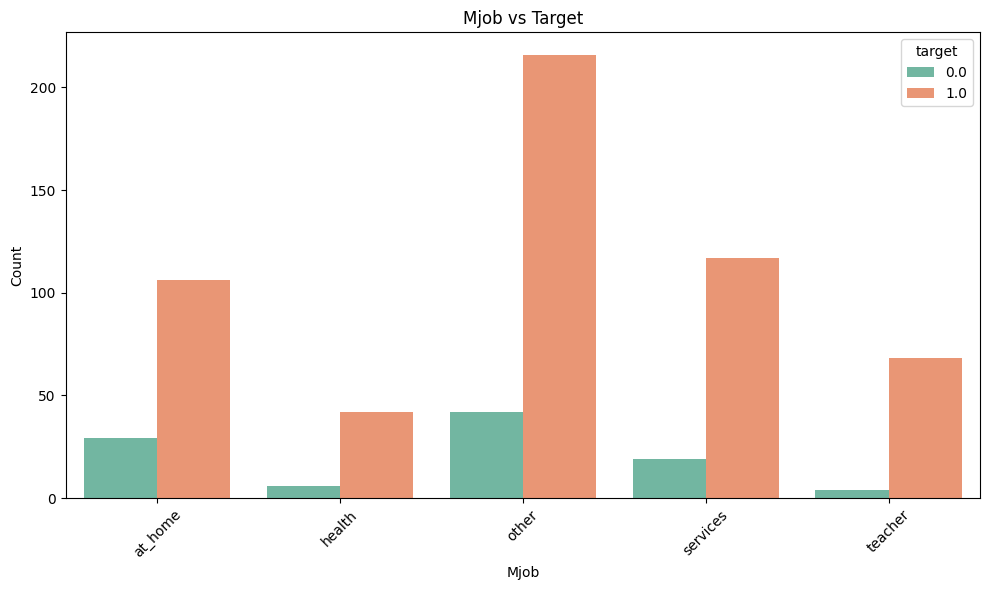

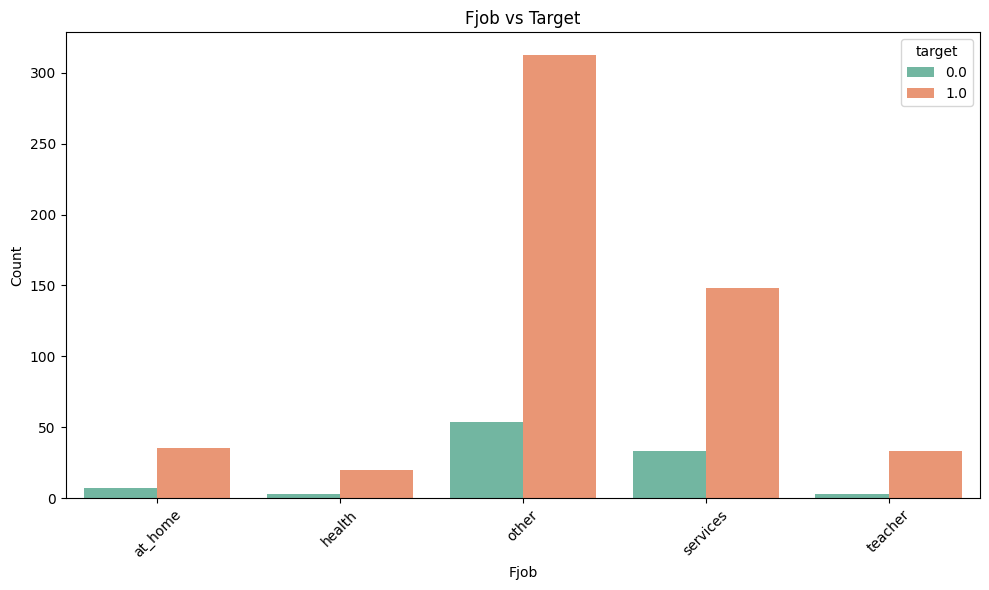

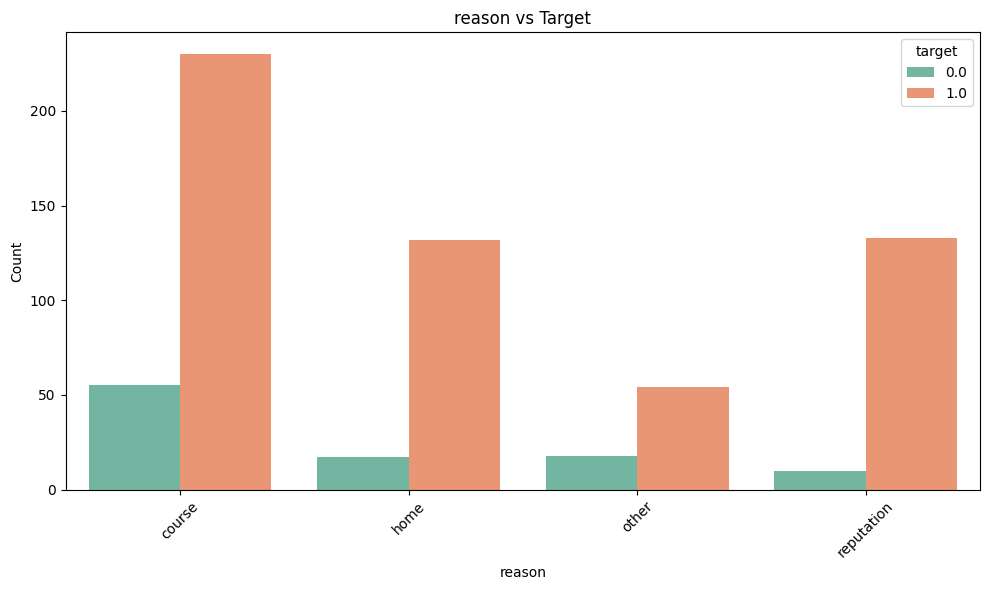

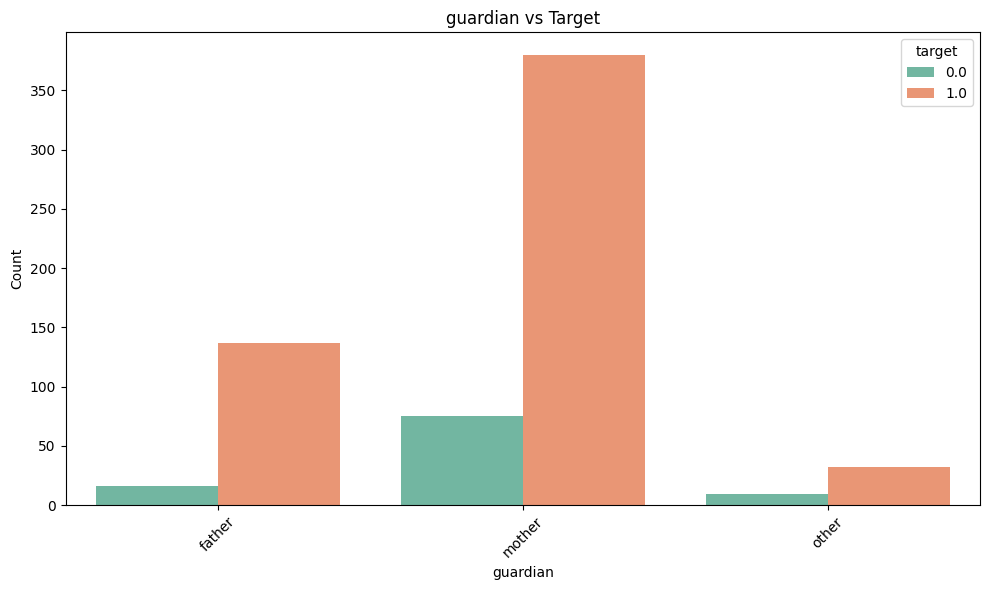

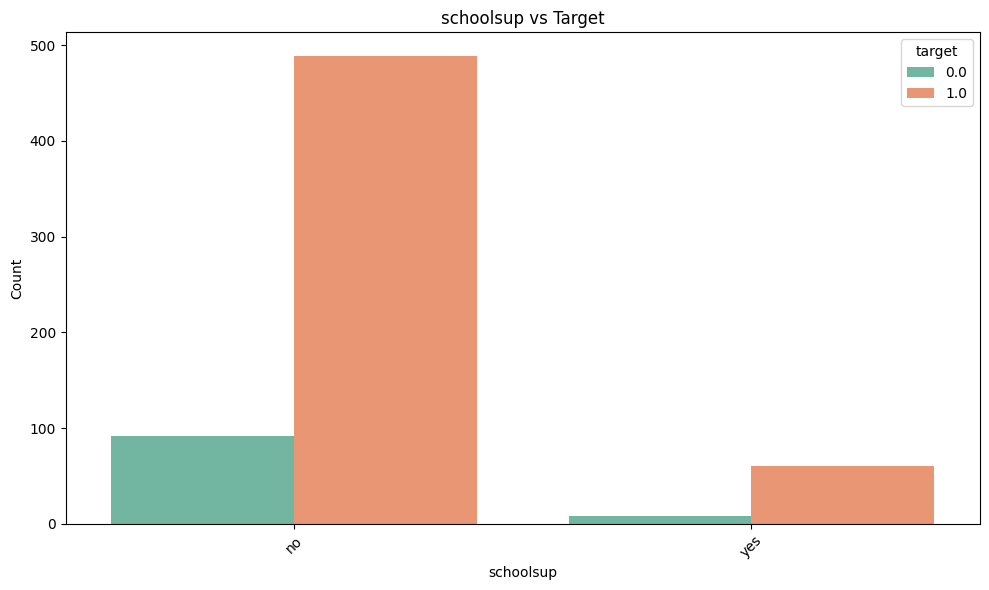

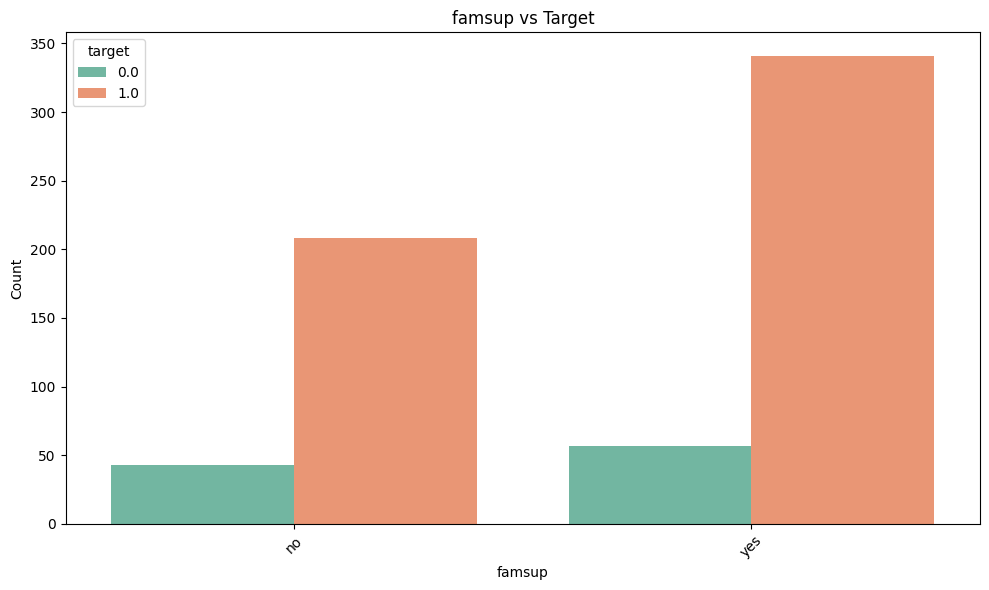

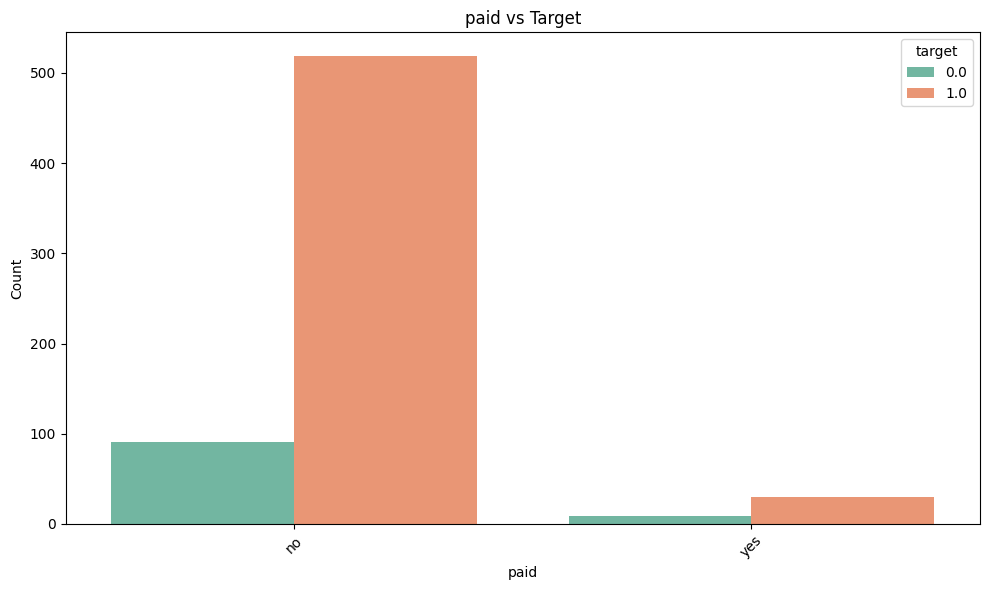

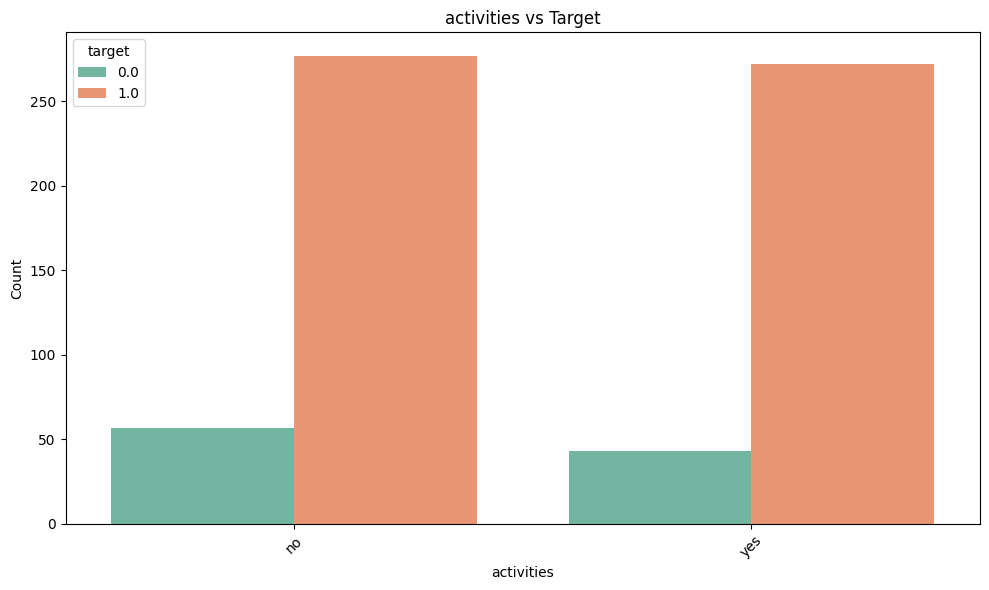

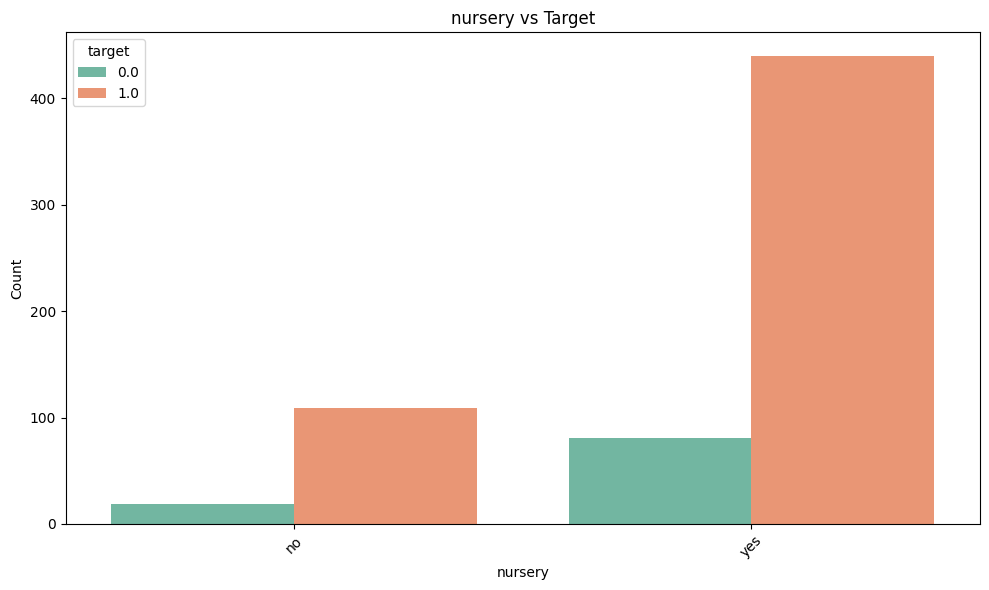

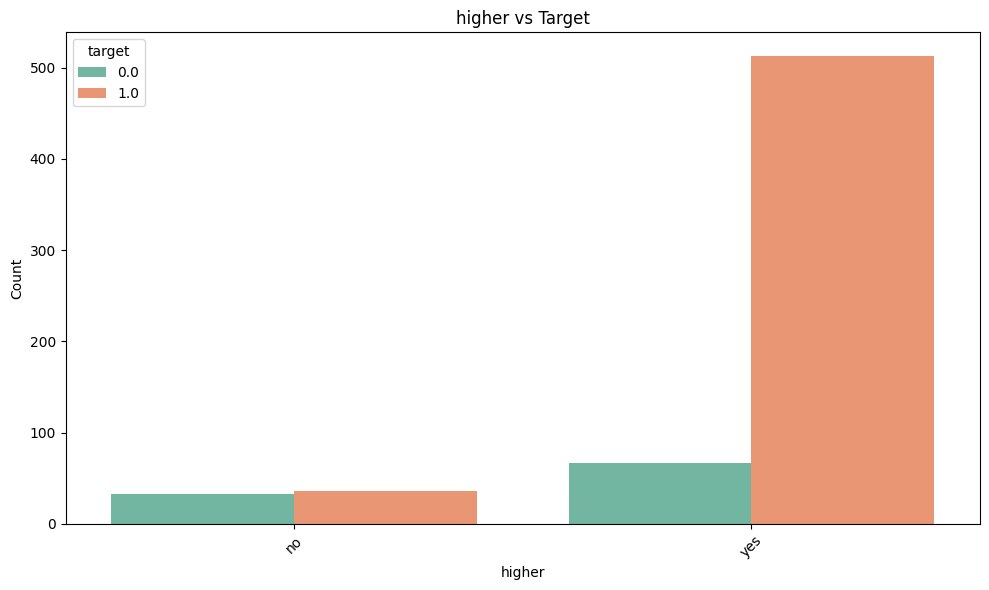

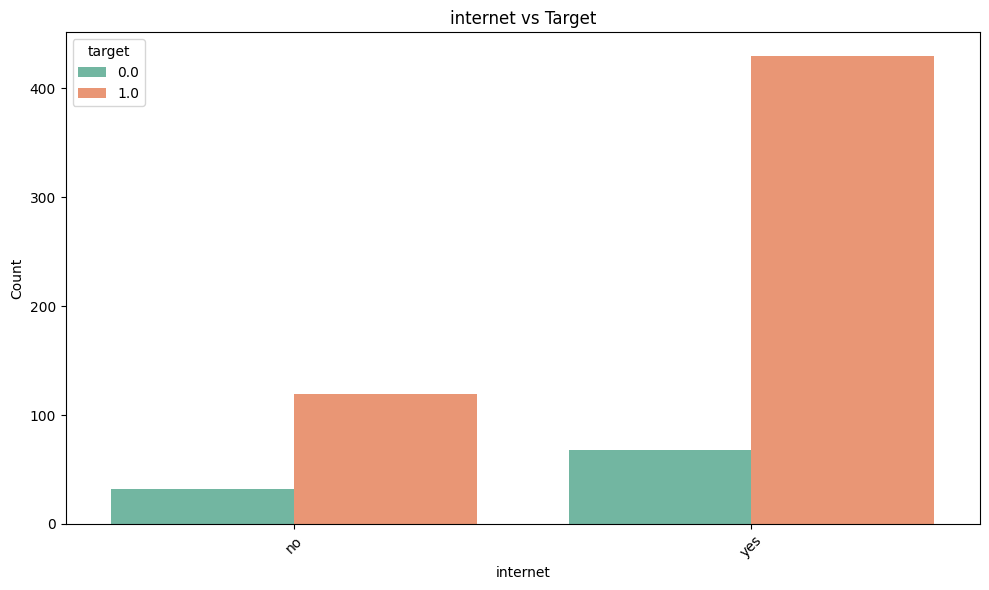

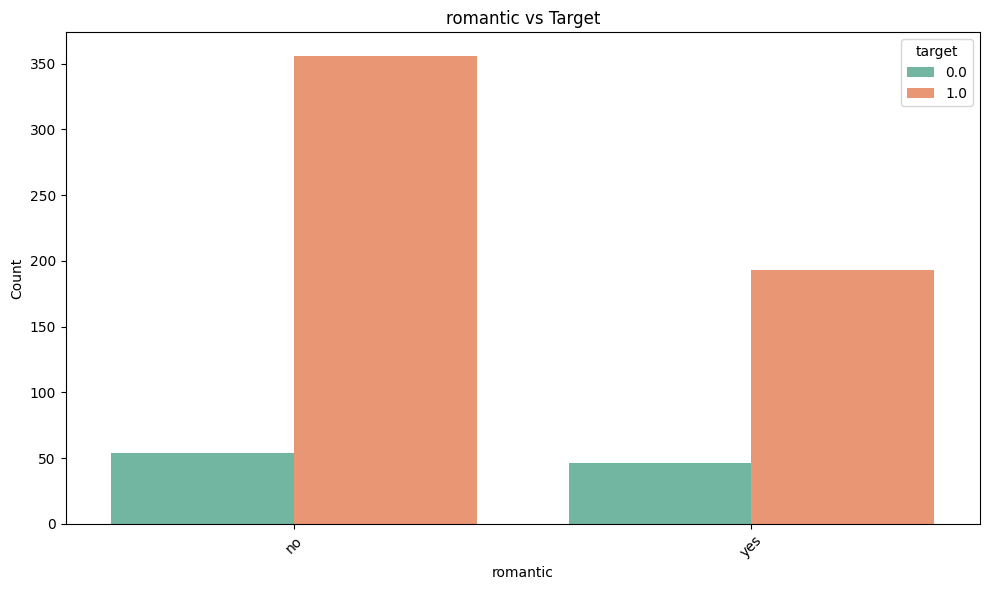

In [18]:
# ===============================
# Paso 8: Gráficos de variables categóricas vs target (solo 16 + target)
# ===============================

# Usar df original (no X con dummies)
df_vis = df.copy()

# Definir las 16 categóricas originales del dataset Student Performance
categorical_columns = [
    'school', 'sex', 'address', 'famsize', 'Pstatus',
    'Mjob', 'Fjob', 'reason', 'guardian',
    'schoolsup', 'famsup', 'paid', 'activities',
    'nursery', 'higher', 'internet', 'romantic'
]

# Agregar target
df_vis["target"] = y.values

# Asegurar que todas estén como category
for col in categorical_columns + ['target']:
    if col in df_vis.columns:
        df_vis[col] = df_vis[col].astype('category')

print("Variables categóricas incluidas:", categorical_columns + ['target'])

# Graficar
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue="target", data=df_vis, palette="Set2")
    plt.title(f'{col} vs Target')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




In [19]:
# ===============================
# Paso 7E: Validación cruzada repetida
# ===============================
from sklearn.model_selection import RepeatedStratifiedKFold

def repeated_cv_metrics(model, X, y, model_label, subset_name, n_splits=5, n_repeats=5):
    rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)
    rows = []
    for train_idx, test_idx in rkf.split(X, y):
        X_train, X_valid = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        try:
            y_pred_prob = model.predict_proba(X_valid)[:, 1]
        except AttributeError:
            y_pred_prob = y_pred

        cm = confusion_matrix(y_valid, y_pred)
        sensitivity = recall_score(y_valid, y_pred)
        specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
        precision = precision_score(y_valid, y_pred)
        f1 = f1_score(y_valid, y_pred)
        accuracy = accuracy_score(y_valid, y_pred)
        try:
            auc = roc_auc_score(y_valid, y_pred_prob)
        except:
            auc = np.nan

        rows.append({
            "Algorithm": model_label,
            "Subset": subset_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "F1": f1,
            "AUC": auc
        })

    return pd.DataFrame(rows)

# ===============================

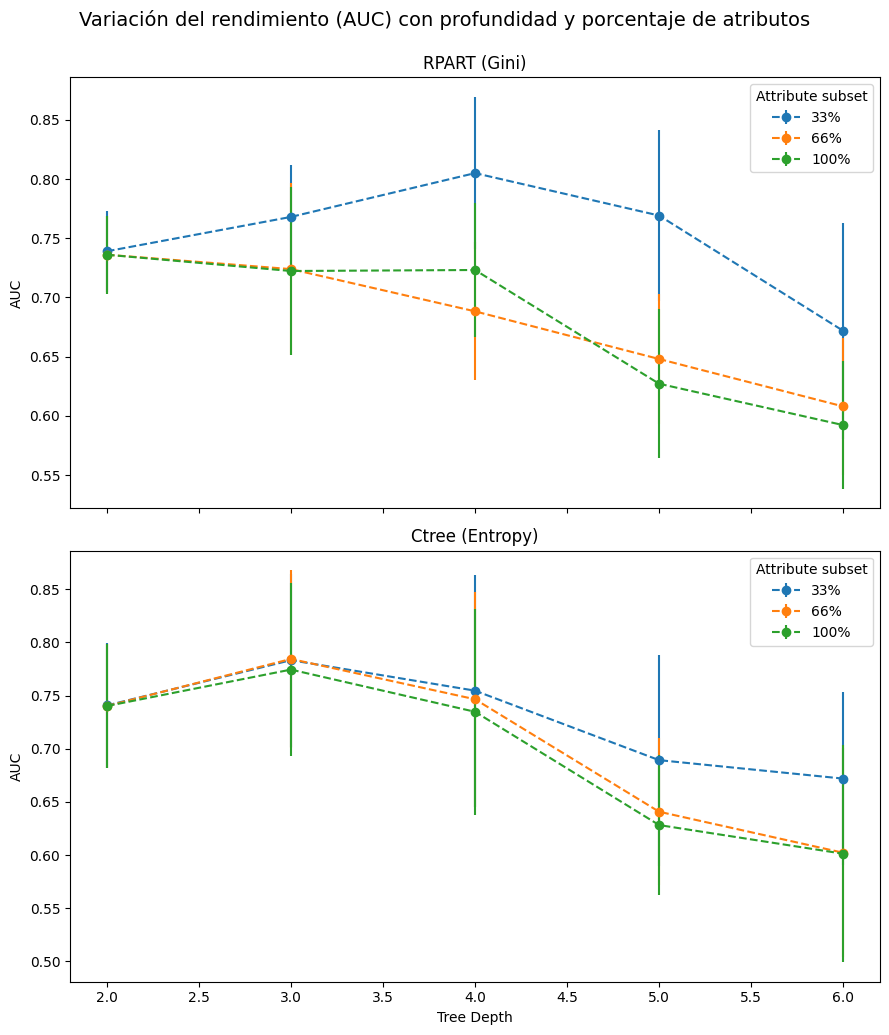

In [20]:
# ===============================
# Paso 8.1: Rendimiento (AUC) con profundidad y porcentaje de atributos
# ===============================

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Obtener importancia de variables desde Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Definir subconjuntos de variables (33%, 66%, 100%)
n_total = len(importances)
n_33 = int(np.ceil(n_total * 0.33))
n_66 = int(np.ceil(n_total * 0.66))

best_33 = importances.head(n_33).index.tolist()
best_66 = importances.head(n_66).index.tolist()
best_100 = importances.index.tolist()

# Crear DataFrames con cada subconjunto
df_vis = X.copy()
df_vis['target'] = y.values

df_33 = df_vis[best_33 + ['target']]
df_66 = df_vis[best_66 + ['target']]
df_100 = df_vis.copy()

attribute_sets = {
    '33%': df_33,
    '66%': df_66,
    '100%': df_100
}

# Definir profundidades de árboles
depths = [2, 3, 4, 5, 6]
results_rpart = []
results_ctree = []

# Evaluar modelos con CV
for name, dataset in attribute_sets.items():
    X_sub = pd.get_dummies(dataset.drop('target', axis=1), drop_first=True).astype('float64')
    y_sub = dataset['target'].astype(int)

    for depth in depths:
        # RPART (criterio gini)
        rpart = DecisionTreeClassifier(max_depth=depth, criterion='gini', random_state=42)
        rpart_scores = cross_val_score(rpart, X_sub, y_sub, cv=5, scoring='roc_auc')
        results_rpart.append({
            'Subset': name,
            'Depth': depth,
            'AUC': np.mean(rpart_scores),
            'Std': np.std(rpart_scores)
        })

        # CTree (criterio entropy)
        ctree = DecisionTreeClassifier(max_depth=depth, criterion='entropy', random_state=42)
        ctree_scores = cross_val_score(ctree, X_sub, y_sub, cv=5, scoring='roc_auc')
        results_ctree.append({
            'Subset': name,
            'Depth': depth,
            'AUC': np.mean(ctree_scores),
            'Std': np.std(ctree_scores)
        })

# Convertir resultados a DataFrames
rpart_df = pd.DataFrame(results_rpart)
ctree_df = pd.DataFrame(results_ctree)

# ===============================
# Gráfica comparativa
# ===============================
fig, axes = plt.subplots(2, 1, figsize=(9, 10), sharex=True)

for subset in rpart_df['Subset'].unique():
    data = rpart_df[rpart_df['Subset'] == subset]
    axes[0].errorbar(data['Depth'], data['AUC'], yerr=data['Std'], label=subset,
                     linestyle='dashed', marker='o')
axes[0].set_title("RPART (Gini)")
axes[0].set_ylabel("AUC")
axes[0].legend(title="Attribute subset")

for subset in ctree_df['Subset'].unique():
    data = ctree_df[ctree_df['Subset'] == subset]
    axes[1].errorbar(data['Depth'], data['AUC'], yerr=data['Std'], label=subset,
                     linestyle='dashed', marker='o')
axes[1].set_title("Ctree (Entropy)")
axes[1].set_xlabel("Tree Depth")
axes[1].set_ylabel("AUC")
axes[1].legend(title="Attribute subset")

plt.tight_layout()
plt.suptitle("Variación del rendimiento (AUC) con profundidad y porcentaje de atributos", fontsize=14, y=1.03)
plt.show()


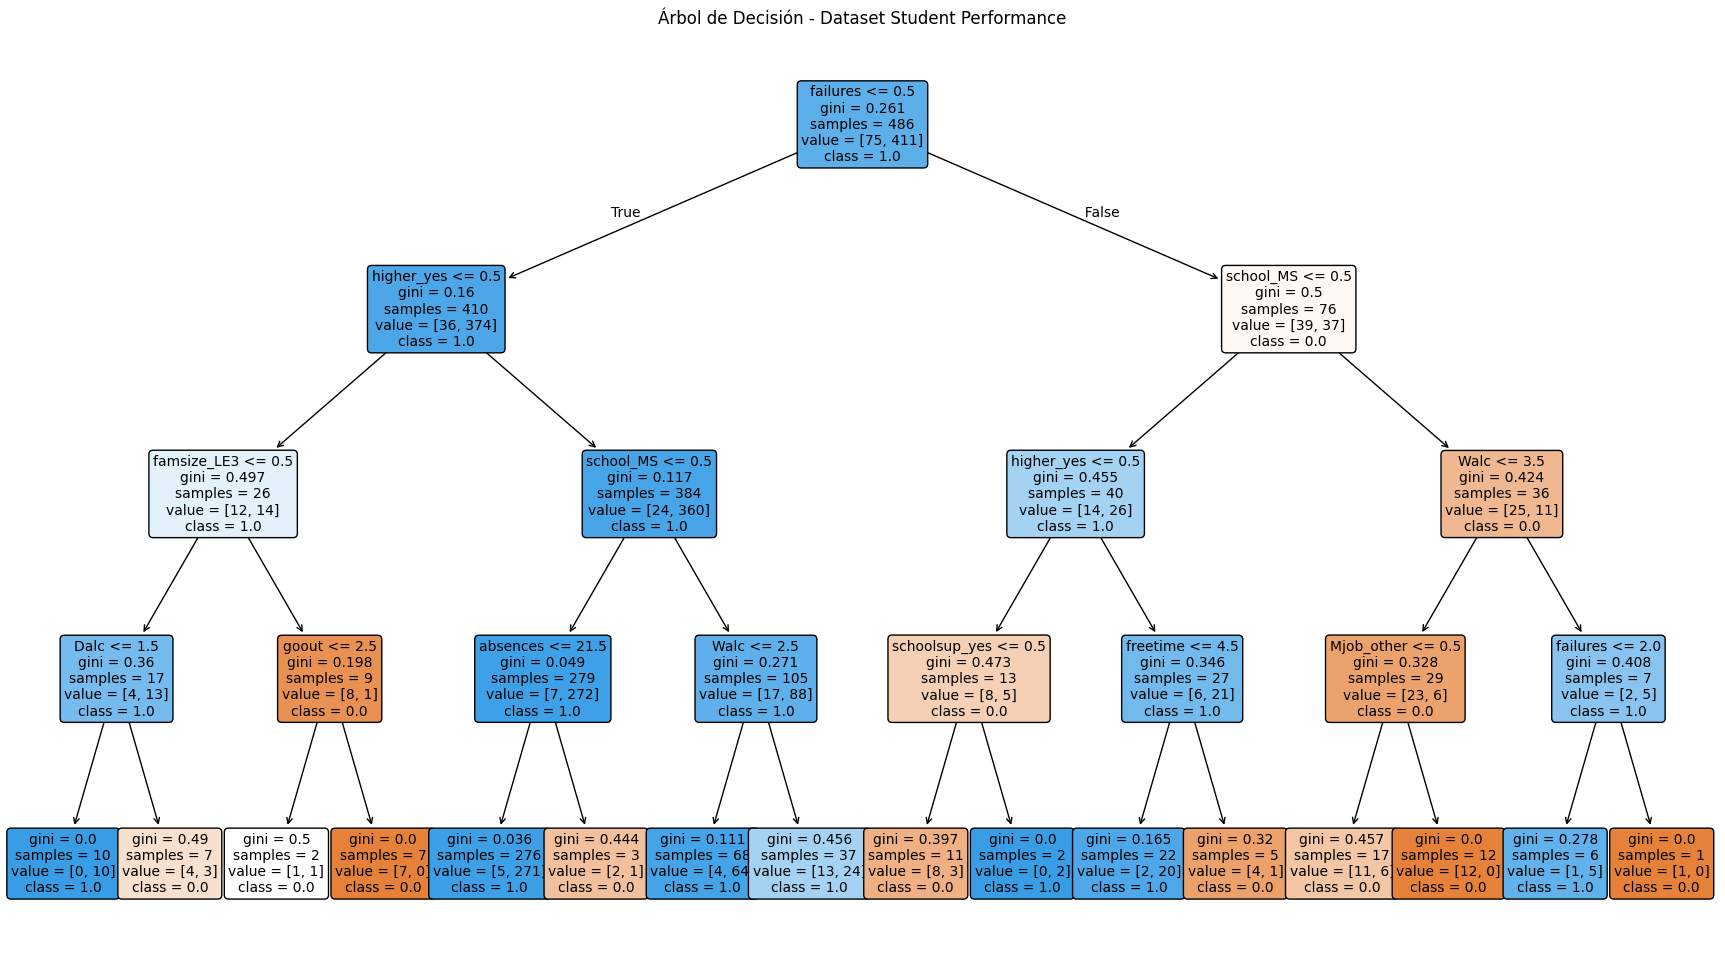

In [21]:
# ===============================
# Paso 9: Árbol de decisión (visualización)
# ===============================

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Dividir en train/test si no lo tienes antes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# Entrenar árbol de decisión con criterio gini
dt = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=42)
dt.fit(X_train, y_train)

# Visualización del árbol
plt.figure(figsize=(22, 12))
plot_tree(
    dt,
    filled=True,
    feature_names=X_train.columns.tolist(),
    class_names=[str(c) for c in dt.classes_],  # dinámico según dataset
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión - Dataset Student Performance")
plt.show()


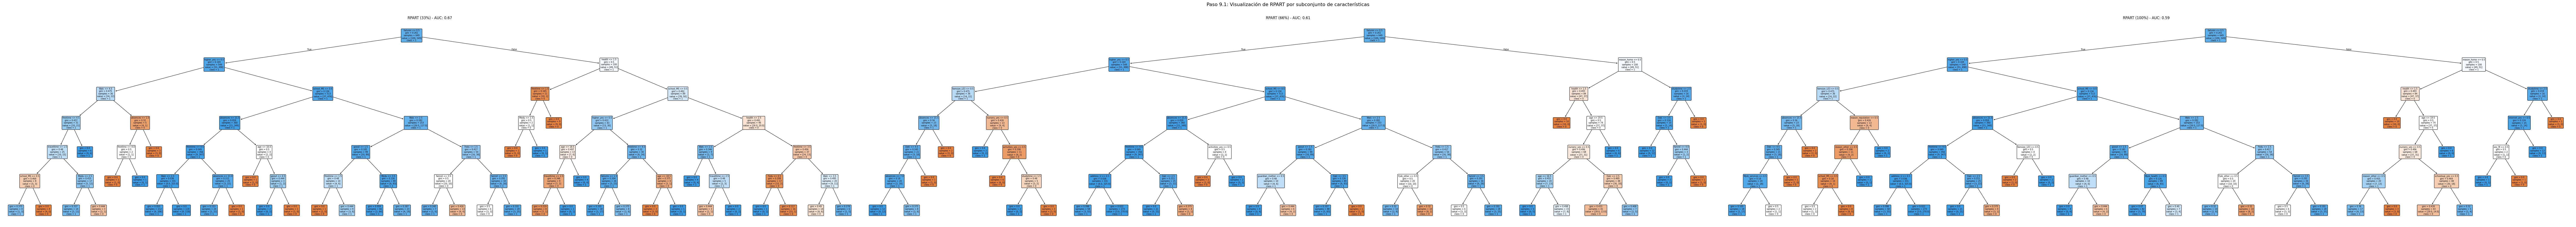

In [22]:
# ===============================
# Paso 9.1: Visualización de RPART con 33%, 66% y 100% de características (max_depth=6)
# ===============================

fig, axes = plt.subplots(1, 3, figsize=(120, 10))

attribute_sets = {
    '33%': df_33,
    '66%': df_66,
    '100%': df_100
}

rpart_auc_scores = {}

for ax, (name, dataset) in zip(axes, attribute_sets.items()):
    X_rpart = pd.get_dummies(dataset.drop('target', axis=1), drop_first=True).astype('float64')
    y_rpart = dataset['target'].astype(int)

    model = DecisionTreeClassifier(max_depth=6, criterion='gini', random_state=42)
    model.fit(X_rpart, y_rpart)

    # Calcular AUC con validación cruzada
    auc = cross_val_score(model, X_rpart, y_rpart, cv=5, scoring='roc_auc').mean()
    rpart_auc_scores[name] = auc

    # Dibujar árbol en el eje correspondiente
    plt.sca(ax)
    plot_tree(
        model,
        feature_names=list(X_rpart.columns),
        class_names=[str(c) for c in model.classes_],
        filled=True,
        rounded=True,
        fontsize=7
    )
    ax.set_title(f"RPART ({name}) - AUC: {auc:.2f}")

plt.tight_layout()
plt.suptitle("Paso 9.1: Visualización de RPART por subconjunto de características", fontsize=16, y=1.05)
plt.show()

In [10]:
from sklearn.tree import export_graphviz
import graphviz

# Datos: Top 33% variables
X_33 = pd.get_dummies(df_33.drop('target', axis=1), drop_first=True).astype('float64')
y_33 = df_33['target'].astype(int)

# Modelo RPART
model_33 = DecisionTreeClassifier(max_depth=6, criterion='gini', random_state=42)
model_33.fit(X_33, y_33)

# Exportar como .dot con estilo académico
dot_data_33 = export_graphviz(
    model_33,
    out_file=None,
    feature_names=X_33.columns,
    class_names=['Not Admitted', 'Admitted'],
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
    precision=2
)

# Crear gráfico con Graphviz y exportar como PNG
graph_33 = graphviz.Source(dot_data_33)
graph_33.render("tree_admission_33pct_clean", format="png", cleanup=False)  # crea 'tree_admission_33pct_clean.png'
graph_33.view()

'tree_admission_33pct_clean.pdf'

In [11]:
# Preparar df_66 con top 66% de variables más importantes
n_66 = int(np.ceil(len(importances) * 0.66))
top_66 = importances.head(n_66).index.tolist()

df_66 = X[top_66].copy()
df_66['target'] = y.values

# Preparar datos
X_66 = pd.get_dummies(df_66.drop('target', axis=1), drop_first=True).astype('float64')
y_66 = df_66['target'].astype(int)

# Entrenar modelo RPART con profundidad 3
model_66_depth3 = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=42)
model_66_depth3.fit(X_66, y_66)

# Exportar con estilo académico
dot_data_66_d3 = export_graphviz(
    model_66_depth3,
    out_file=None,
    feature_names=X_66.columns,
    class_names=['Not Admitted', 'Admitted'],
    filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
    precision=2
)

# Crear gráfico y exportar como PNG
graph_66_d3 = graphviz.Source(dot_data_66_d3)
output_path_66_d3 = "/mnt/data/arbol_admision_66pct_depth3"
graph_66_d3.render(output_path_66_d3, format="png", cleanup=False)
output_path_66_d3 + ".png"

'/mnt/data/arbol_admision_66pct_depth3.png'

In [12]:
from sklearn.tree import export_graphviz
import graphviz

# 100%
X_100 = pd.get_dummies(df_100.drop('target', axis=1), drop_first=True).astype('float64')
y_100 = df_100['target'].astype('category').cat.codes

# Reemplazar caracteres conflictivos en nombres de columnas
X_100.columns = X_100.columns.str.replace("&", "and").str.replace(">", "gt").str.replace("<", "lt")

model_100 = DecisionTreeClassifier(max_depth=6, criterion='gini', random_state=42)
model_100.fit(X_100, y_100)

dot_data_100 = export_graphviz(
    model_100,
    out_file=None,
    feature_names=X_100.columns,
    class_names=['Healthy', 'Heart Disease'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph_100 = graphviz.Source(dot_data_100)
graph_100.render("tree_100", format="png", cleanup=False)
graph_100.view()

'tree_100.pdf'

In [13]:
# Paso 9: Subconjuntos 33%, 66%, 100%
# ===============================
ranking_sorted = ranking_df.sort_values("Rank")
total_features = len(ranking_sorted)

top_33 = ranking_sorted.head(int(total_features * 0.33)).index.tolist()
top_66 = ranking_sorted.head(int(total_features * 0.66)).index.tolist()
top_100 = ranking_sorted.index.tolist()

datasets = {
    '33%': df_encoded[top_33 + ['target']],
    '66%': df_encoded[top_66 + ['target']],
    '100%': df_encoded[top_100 + ['target']]
}

# ===============================
# Paso 8: Evaluación y resultados
# ===============================
results_all = []
for name, dataset in datasets.items():
    X_eval = dataset.drop('target', axis=1)
    y_eval = dataset['target']

    for model_label, model in models.items():
        print(f"Evaluando {model_label} en subconjunto {name}...")
        df_metrics = repeated_cv_metrics(model, X_eval, y_eval, model_label, name, n_splits=5, n_repeats=5)
        results_all.append(df_metrics)

df_results_all = pd.concat(results_all, ignore_index=True)

Evaluando AdaBoost en subconjunto 33%...
Evaluando Bagging en subconjunto 33%...
Evaluando GBM en subconjunto 33%...
Evaluando ERT en subconjunto 33%...
Evaluando RandomForest en subconjunto 33%...
Evaluando XGB en subconjunto 33%...


c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [11:28:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [11:28:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [11:28:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [11:28:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

Evaluando LogisticRegression en subconjunto 33%...
Evaluando NaiveBayes en subconjunto 33%...
Evaluando MLP en subconjunto 33%...


c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warning

Evaluando KNN en subconjunto 33%...
Evaluando SVM en subconjunto 33%...
Evaluando DecisionTree en subconjunto 33%...
Evaluando LDA en subconjunto 33%...
Evaluando QDA en subconjunto 33%...
Evaluando AdaBoost en subconjunto 66%...
Evaluando Bagging en subconjunto 66%...
Evaluando GBM en subconjunto 66%...
Evaluando ERT en subconjunto 66%...
Evaluando RandomForest en subconjunto 66%...
Evaluando XGB en subconjunto 66%...


c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [11:28:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [11:28:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [11:29:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [11:29:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

Evaluando LogisticRegression en subconjunto 66%...
Evaluando NaiveBayes en subconjunto 66%...
Evaluando MLP en subconjunto 66%...


c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warning

Evaluando KNN en subconjunto 66%...
Evaluando SVM en subconjunto 66%...
Evaluando DecisionTree en subconjunto 66%...
Evaluando LDA en subconjunto 66%...
Evaluando QDA en subconjunto 66%...
Evaluando AdaBoost en subconjunto 100%...
Evaluando Bagging en subconjunto 100%...
Evaluando GBM en subconjunto 100%...
Evaluando ERT en subconjunto 100%...
Evaluando RandomForest en subconjunto 100%...
Evaluando XGB en subconjunto 100%...


c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [11:30:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [11:30:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [11:30:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [11:30:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

Evaluando LogisticRegression en subconjunto 100%...
Evaluando NaiveBayes en subconjunto 100%...
Evaluando MLP en subconjunto 100%...


c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\americasys\Desktop\nuevotest\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Evaluando KNN en subconjunto 100%...
Evaluando SVM en subconjunto 100%...
Evaluando DecisionTree en subconjunto 100%...
Evaluando LDA en subconjunto 100%...
Evaluando QDA en subconjunto 100%...


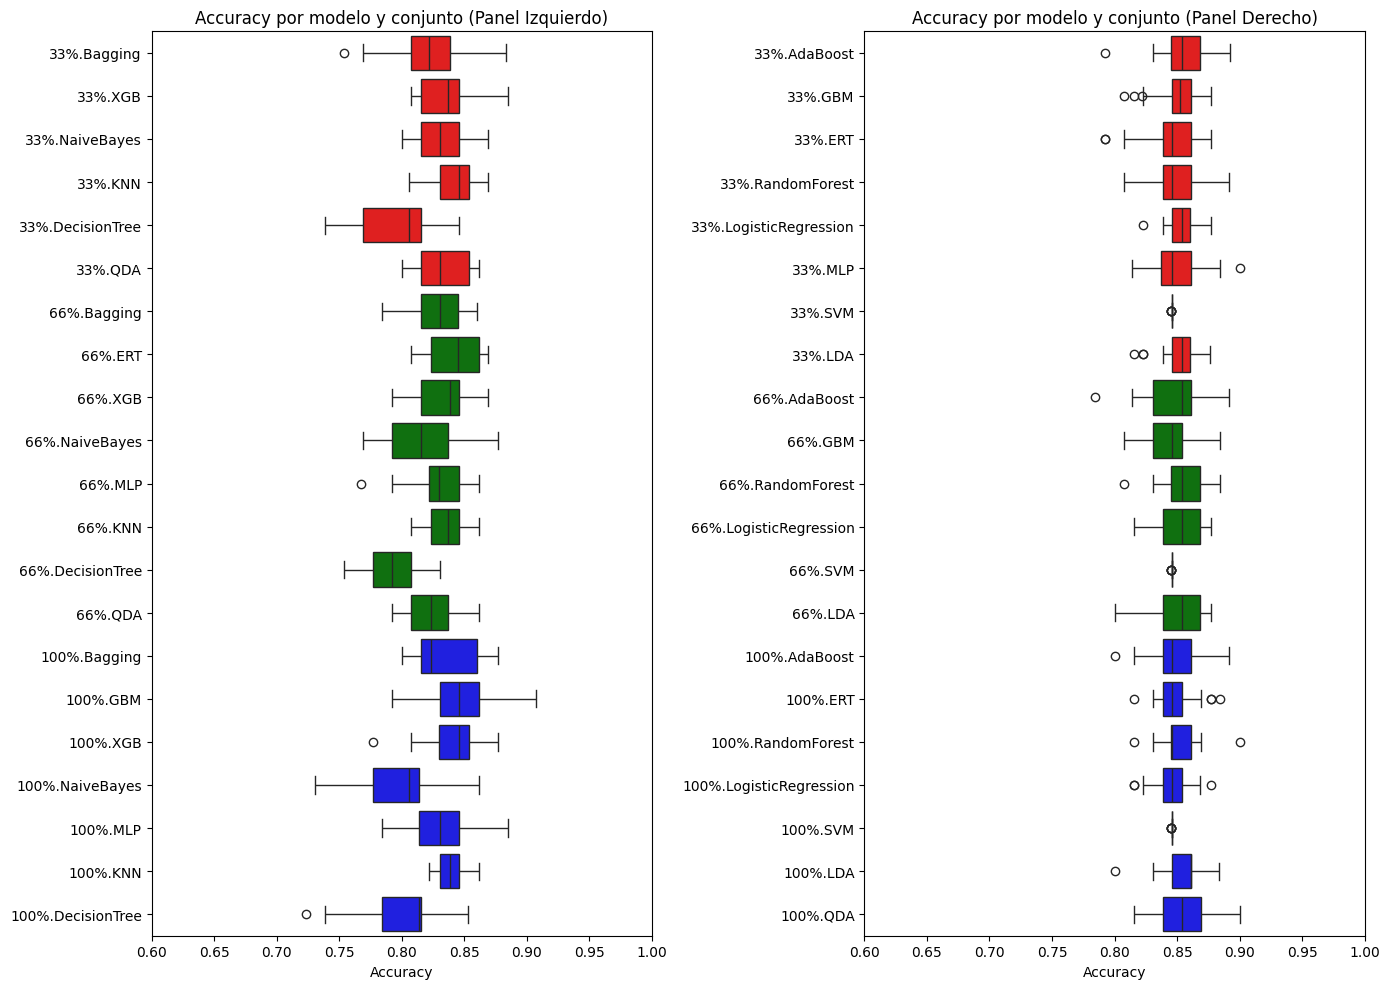

In [ ]:
# ===============================
# Paso 9: Visualización tipo panel
# ===============================
import matplotlib.gridspec as gridspec

metric = 'Accuracy'
df_results_all['Label'] = df_results_all['Subset'] + '.' + df_results_all['Algorithm']

sorted_labels = df_results_all.groupby('Label')[metric].mean().sort_values().index

fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
axs = [plt.subplot(gs[0]), plt.subplot(gs[1])]

half = len(sorted_labels) // 2

for i, ax in enumerate(axs):
    labels = sorted_labels[half * i:half * (i + 1)]
    subset = df_results_all[df_results_all['Label'].isin(labels)]
    sns.boxplot(
        data=subset,
        y='Label',
        x=metric,
        hue='Subset',
        orient='h',
        ax=ax,
        palette={'33%': 'red', '66%': 'green', '100%': 'blue'}
    )
    ax.set_xlim(0.6, 1.0)
    ax.set_xlabel('Accuracy')
    ax.set_ylabel('')
    ax.set_title(f'Accuracy por modelo y conjunto ({"Panel Izquierdo" if i == 0 else "Panel Derecho"})')
    ax.legend_.remove()

plt.tight_layout()
plt.show()

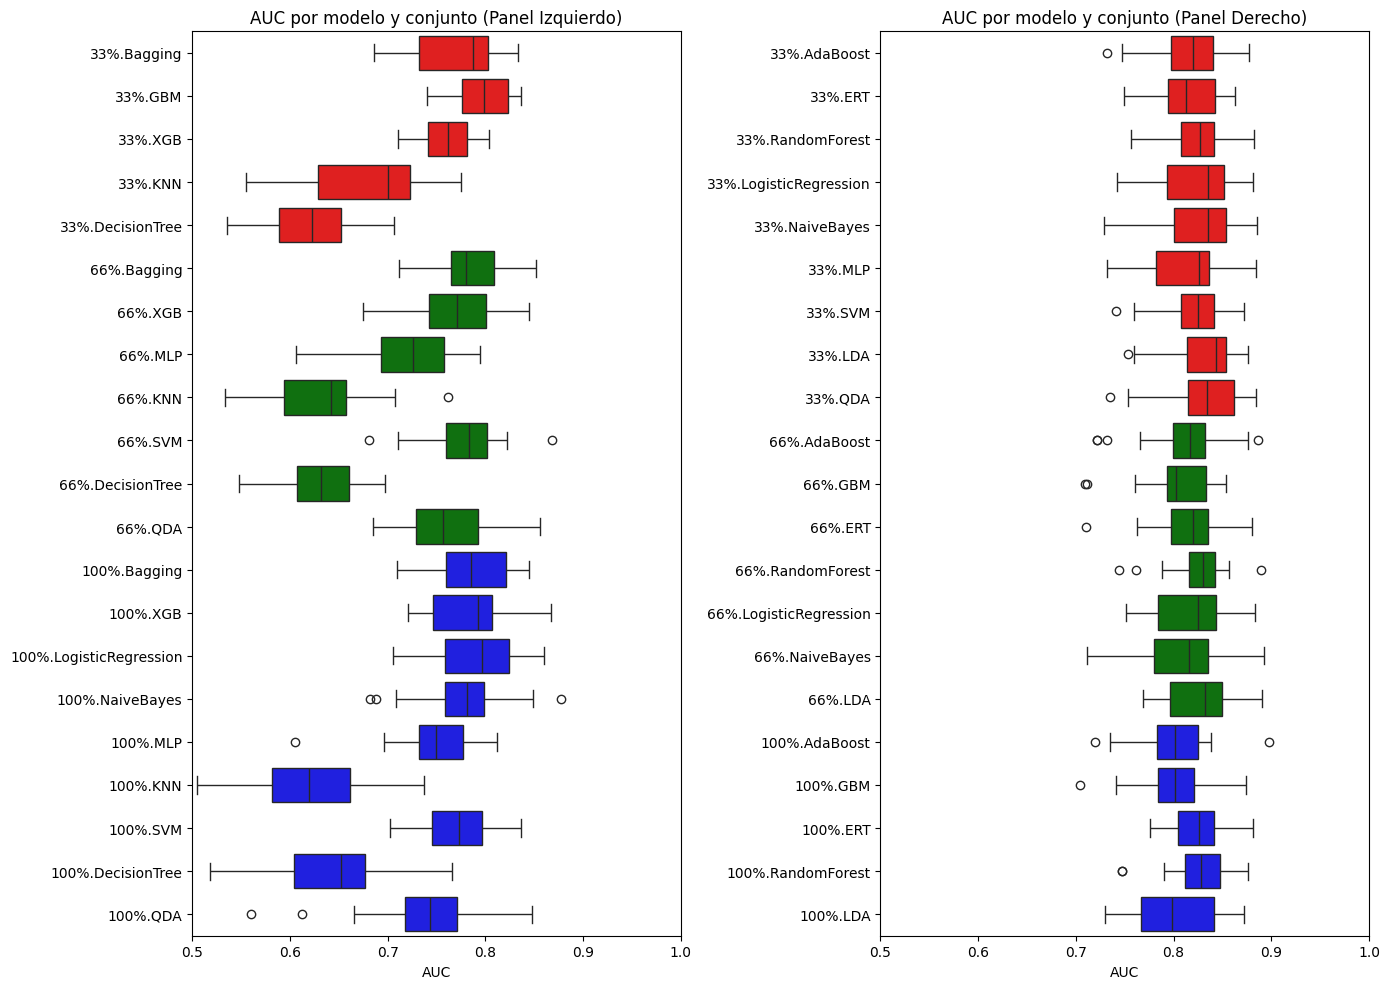

In [ ]:
# ===============================
# Paso 9 (AUC): Visualización tipo panel
# ===============================
import matplotlib.gridspec as gridspec

# Si tu columna viene en minúsculas, la normalizamos:
if 'AUC' not in df_results_all.columns:
    maybe_auc = [c for c in df_results_all.columns if c.lower() == 'auc']
    if maybe_auc:
        df_results_all['AUC'] = df_results_all[maybe_auc[0]]
    else:
        raise ValueError("No encuentro la columna 'AUC' en df_results_all.")

metric = 'AUC'
df_results_all['Label'] = df_results_all['Subset'] + '.' + df_results_all['Algorithm']

# Orden para mostrar (promedio de AUC por Label)
sorted_labels = (
    df_results_all.groupby('Label')[metric]
    .mean()
    .sort_values()
    .index
)

fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
axs = [plt.subplot(gs[0]), plt.subplot(gs[1])]

half = len(sorted_labels) // 2

for i, ax in enumerate(axs):
    labels = sorted_labels[half * i : half * (i + 1)]
    subset = df_results_all[df_results_all['Label'].isin(labels)]
    sns.boxplot(
        data=subset,
        y='Label',
        x=metric,
        hue='Subset',
        orient='h',
        ax=ax,
        palette={'33%': 'red', '66%': 'green', '100%': 'blue'}
    )
    ax.set_xlim(0.5, 1.0)               # típico rango para AUC
    ax.set_xlabel('AUC')
    ax.set_ylabel('')
    ax.set_title(f'AUC por modelo y conjunto ({"Panel Izquierdo" if i == 0 else "Panel Derecho"})')
    ax.legend_.remove()

plt.tight_layout()
plt.show()


In [ ]:
import time
import warnings
from sklearn.metrics import roc_auc_score

warnings.filterwarnings('ignore')

# Preparar versiones del dataset con diferentes números de atributos
feature_sets = {
    'all': X.columns.tolist(),
    'top5': ranking_df.sort_values("Rank").head(5).index.tolist(),
    'top3': ranking_df.sort_values("Rank").head(3).index.tolist()
}

rashomon_results = []
epsilon = 0.01  # 1% del mejor AUC

for subset_name, features in feature_sets.items():
    X_sub = X[features]
    X_train_r, X_valid_r, y_train_r, y_valid_r = train_test_split(X_sub, y, test_size=0.25, random_state=42)

    subset_scores = []
    best_auc = 0

    for model_label, model in models.items():
        try:
            start = time.time()
            model.fit(X_train_r, y_train_r)
            train_time = time.time() - start

            y_pred = model.predict(X_valid_r)
            try:
                y_prob = model.predict_proba(X_valid_r)[:, 1]
            except:
                y_prob = y_pred

            auc = roc_auc_score(y_valid_r, y_prob)
            best_auc = max(best_auc, auc)

            if hasattr(model, 'n_estimators'):
                complexity = model.n_estimators
            elif hasattr(model, 'coef_'):
                complexity = model.coef_.shape[1]
            elif hasattr(model, 'hidden_layer_sizes'):
                complexity = sum(model.hidden_layer_sizes)
            elif hasattr(model, 'tree_'):
                complexity = model.tree_.max_depth
            else:
                complexity = train_time

            subset_scores.append({
                'Subset': subset_name,
                'Model': model_label,
                'AUC': auc,
                'TrainingTime': train_time,
                'Complexity': complexity
            })
        except Exception as e:
            print(f'Error with {model_label} on {subset_name}:', e)

    rashomon_models = [s for s in subset_scores if s['AUC'] >= (best_auc - epsilon)]
    rashomon_volume = len(rashomon_models)

    for score in subset_scores:
        score['BestAUC'] = best_auc
        score['RashomonVolume'] = rashomon_volume
        score['WithinEpsilon'] = score['AUC'] >= (best_auc - epsilon)

    rashomon_results.extend(subset_scores)

rashomon_df = pd.DataFrame(rashomon_results)
rashomon_df

,Subset,Model,AUC,TrainingTime,Complexity,BestAUC,RashomonVolume,WithinEpsilon
0,all,AdaBoost,0.778147,0.119434,50.000000,0.808042,3,False
1,all,Bagging,0.719755,0.040545,10.000000,0.808042,3,False
2,all,GBM,0.781818,0.195446,100.000000,0.808042,3,False
3,all,ERT,0.713986,0.139622,100.000000,0.808042,3,False
4,all,RandomForest,0.744580,0.163614,100.000000,0.808042,3,False
5,all,XGB,0.761189,0.070292,NaN,0.808042,3,False
6,all,LogisticRegression,0.808042,0.043122,39.000000,0.808042,3,True
7,all,NaiveBayes,0.728322,0.000000,0.000000,0.808042,3,False
8,all,MLP,0.762238,1.349246,100.000000,0.808042,3,False
9,all,KNN,0.608392,0.000000,0.000000,0.808042,3,False


In [ ]:
# Identificar modelos en el frente de Pareto (AUC vs. Complejidad)

def is_pareto_efficient(df, perf_col="AUC", cost_col="Complexity"):
    is_efficient = []
    for i, row_i in df.iterrows():
        dominated = False
        for j, row_j in df.iterrows():
            if (
                (row_j[perf_col] >= row_i[perf_col])
                and (row_j[cost_col] <= row_i[cost_col])
                and ((row_j[perf_col] > row_i[perf_col]) or (row_j[cost_col] < row_i[cost_col]))
            ):
                dominated = True
                break
        is_efficient.append(not dominated)
    return is_efficient

# Aplicar por subconjunto
pareto_df_list = []
for subset in rashomon_df['Subset'].unique():
    df_subset = rashomon_df[rashomon_df['Subset'] == subset].copy()
    df_subset['ParetoFront'] = is_pareto_efficient(df_subset)
    pareto_df_list.append(df_subset)

pareto_df = pd.concat(pareto_df_list)

# Exportar modelos en el frente de Pareto
pareto_df[pareto_df['ParetoFront']].to_csv("rashomon_pareto_models.csv", index=False)
print("Modelos en el frente de Pareto exportados como 'rashomon_pareto_models.csv'")
pareto_df[pareto_df['ParetoFront']]

Modelos en el frente de Pareto exportados como 'rashomon_pareto_models.csv'


,Subset,Model,AUC,TrainingTime,Complexity,BestAUC,RashomonVolume,WithinEpsilon,ParetoFront
5,all,XGB,0.761189,0.070292,NaN,0.808042,3,False,True
6,all,LogisticRegression,0.808042,0.043122,39.000000,0.808042,3,True,True
10,all,SVM,0.801748,0.031423,0.031423,0.808042,3,True,True
13,all,QDA,0.733392,0.000000,0.000000,0.808042,3,False,True
19,top5,XGB,0.769580,0.058800,NaN,0.815035,2,False,True
21,top5,NaiveBayes,0.815035,0.000000,0.000000,0.815035,2,True,True
33,top3,XGB,0.768531,0.069359,NaN,0.774825,11,True,True
34,top3,LogisticRegression,0.774825,0.004232,3.000000,0.774825,11,True,True
41,top3,QDA,0.772727,0.000000,0.000000,0.774825,11,True,True


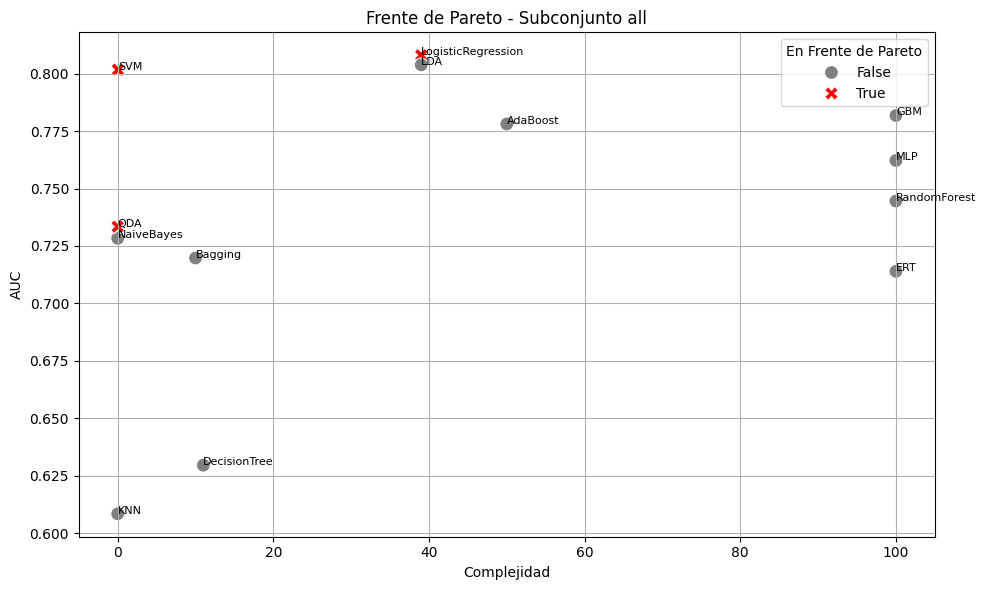

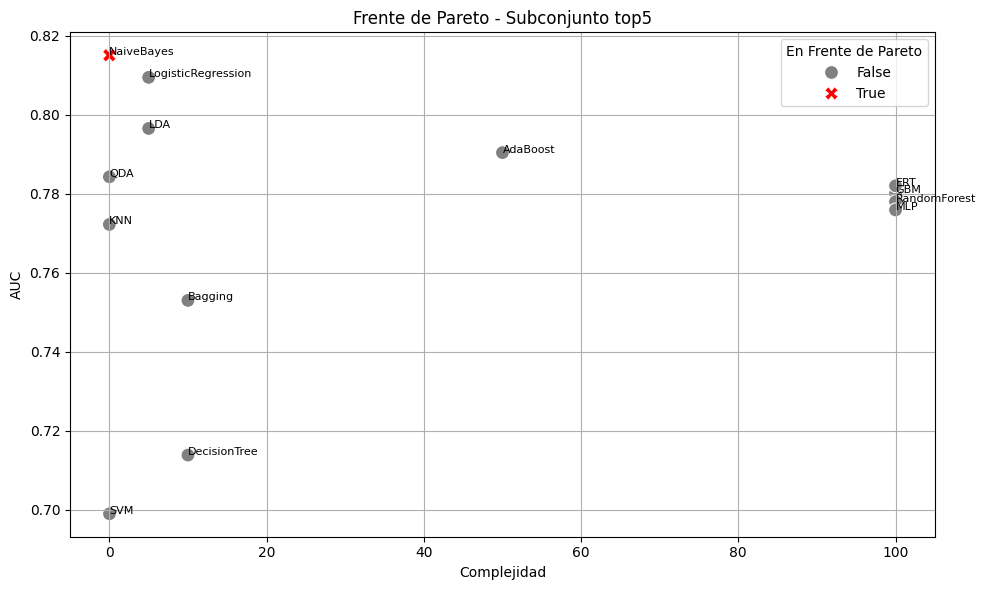

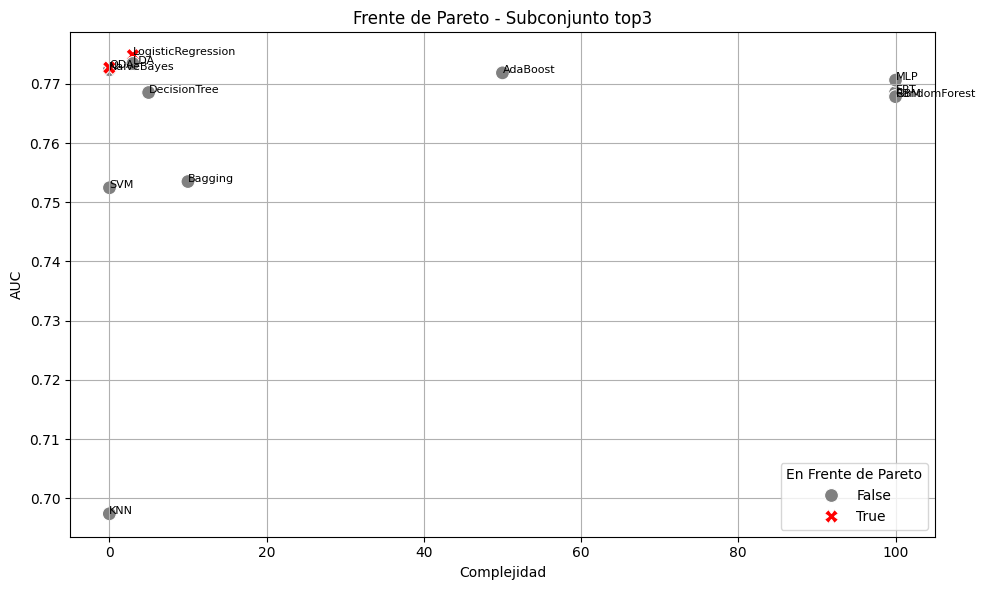

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización del frente de Pareto para cada subconjunto
for subset in pareto_df['Subset'].unique():
    data = pareto_df[pareto_df['Subset'] == subset]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='Complexity', y='AUC',
        hue='ParetoFront',
        style='ParetoFront',
        palette={True: 'red', False: 'gray'},
        data=data,
        s=100
    )
    for _, row in data.iterrows():
        plt.text(row['Complexity'], row['AUC'], row['Model'], fontsize=8)

    plt.title(f'Frente de Pareto - Subconjunto {subset}')
    plt.xlabel('Complejidad')
    plt.ylabel('AUC')
    plt.legend(title='En Frente de Pareto')
    plt.grid(True)
    plt.tight_layout()
    plt.show()